# PISA 2022 Data Analysis: Understanding Global Student Performance

# Introduction

This notebook presents an in-depth analysis of the Programme for International Student Assessment (PISA) 2022 dataset, focusing on student performance across countries, socioeconomic factors, and demographic characteristics. PISA is an international assessment that evaluates education systems worldwide by testing the skills and knowledge of 15-year-old students as they approach the end of their compulsory education.

The PISA 2022 assessment covered approximately 600,000 students across participating countries, providing rich insights into educational outcomes globally. This analysis aims to uncover patterns and relationships in student performance, with particular attention to:

- Country-level differences in academic achievement
- Gender gaps across different subject domains
- The impact of socioeconomic status on performance
- The interplay between school climate and academic outcomes

By examining these relationships, we can better understand the factors that contribute to effective educational systems and identify potential areas for policy intervention.

# Data Overview

The PISA 2022 dataset contains student questionnaire data that includes:

- Performance metrics in mathematics, reading, and science
- Student demographic information
- Socioeconomic indicators (ESCS index)
- School climate and contextual factors
- Country and regional identifiers

The dataset is extensive, requiring careful preprocessing and optimization techniques to manage memory usage efficiently.

# Research Questions

This analysis seeks to answer the following key questions:

- Which countries demonstrate the highest performance across different subject areas in PISA 2022?

- How do male and female students perform differently across the three core PISA domains?

- Which countries demonstrate the strongest link between socioeconomic status and academic performance?

- What is the relationship between a country's average socioeconomic status and its mathematics performance?


# Methodology

The analysis follows a structured approach:

- **Data Preparation:** Cleaning, optimization, and transformation of the raw PISA dataset
- **Exploratory Data Analysis:** Investigation of distributions, relationships, and patterns
- **In-depth Analysis:** Focused examination of key research questions
- **Visualization:** Creation of insightful visualizations to communicate findings
- **Interpretation:** Drawing conclusions and implications from the results

This notebook demonstrates not only the technical aspects of working with large educational datasets but also provides substantive insights into global patterns of educational achievement.

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadstat
import os
import gc
import sys
from scipy import stats

# sav_file = "dataset/CY08MSP_STU_QQQ.SAV"
# print(f"Converting {sav_file} to CSV")
# df, meta = pyreadstat.read_sav(sav_file)
# print(df.head())
# csv_file = "dataset/CY08MSP_STU_QQQ.csv"
# df.to_csv(csv_file, index=False)
# print(f"CSV file saved as {csv_file}")
# print("Done")



In [93]:
# csv_file = "dataset/pisa.csv"
# df.to_csv(csv_file, index=False)

In [94]:
student_df = pd.read_csv("dataset/pisa.csv")
student_df.shape

MemoryError: Unable to allocate 5.76 GiB for an array with shape (1260, 613744) and data type float64

In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613744 entries, 0 to 613743
Columns: 1278 entries, CNT to VER_DAT
dtypes: float64(1260), int64(14), object(4)
memory usage: 5.8+ GB


In [ ]:
student_df.describe().to_csv("outputs/pisa_describe.csv")

In [ ]:
student_df.describe().info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, count to max
Columns: 1274 entries, CNTRYID to SENWT
dtypes: float64(1274)
memory usage: 79.7+ KB


In [ ]:
student_df.head()

,CNT,CNTRYID,CNTSCHID,CNTSTUID,CYC,NatCen,STRATUM,SUBNATIO,REGION,OECD,...,PV3MPRE,PV4MPRE,PV5MPRE,PV6MPRE,PV7MPRE,PV8MPRE,PV9MPRE,PV10MPRE,SENWT,VER_DAT
0,ALB,8.0,800282.0,800001.0,08MS,800,ALB03,80000,800.0,0.0,...,226.250,203.029,219.817,331.017,223.752,305.671,230.156,289.436,0.55561,03MAY23:10:11:25
1,ALB,8.0,800115.0,800002.0,08MS,800,ALB03,80000,800.0,0.0,...,298.644,321.405,320.452,284.836,364.565,304.044,347.626,352.269,0.76431,03MAY23:10:11:25
2,ALB,8.0,800242.0,800003.0,08MS,800,ALB01,80000,800.0,0.0,...,383.340,376.019,285.901,289.896,338.469,316.296,324.361,343.351,1.37877,03MAY23:10:11:25
3,ALB,8.0,800245.0,800005.0,08MS,800,ALB08,80000,800.0,0.0,...,264.532,303.422,327.793,165.575,246.156,238.322,275.860,227.466,1.49361,03MAY23:10:11:26
4,ALB,8.0,800285.0,800006.0,08MS,800,ALB03,80000,800.0,0.0,...,399.300,514.739,539.850,461.793,514.465,510.462,490.537,503.793,0.65249,03MAY23:10:11:26


In [ ]:
student_df['ST004D01T'].value_counts()

ST004D01T
2.0    307906
1.0    305759
Name: count, dtype: int64

In [ ]:
# textual_columns = student_df.select_dtypes(include=['object']).columns
# numerical_columns = student_df.select_dtypes(include=['number']).columns
# textual_columns, numerical_columns

In [ ]:
# student_df[textual_columns].head()

In [ ]:
# student_df['CNT'].value_counts()
# # convert to categorical
# student_df['CNT'] = student_df['CNT'].astype('category')

In [ ]:
# student_df['CYC'].value_counts()
# # convert to categorical
# # student_df['CNT'] = student_df['CNT'].astype('category')

In [ ]:
# student_df['STRATUM'].value_counts()

In [ ]:
def memory_usage(pandas_obj):
    """Calculate memory usage of a pandas object in MB"""
    if isinstance(pandas_obj, pd.DataFrame):
        usage_bytes = pandas_obj.memory_usage(deep=True).sum()
    else:  # Series
        usage_bytes = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_bytes / (1024 * 1024)
    return usage_mb

In [ ]:
def optimize_floats(df):
    """Optimize float dtypes by downcasting to float32 where possible"""
    float_cols = df.select_dtypes(include=['float64']).columns
    
    for col in float_cols:
        # Check if column can be represented as float32 without losing precision
        # For PISA data, most measurements don't need float64 precision
        df[col] = pd.to_numeric(df[col], downcast='float')
    
    return df

In [ ]:
def optimize_ints(df):
    """Optimize integer dtypes by downcasting to smallest possible integer type"""
    int_cols = df.select_dtypes(include=['int64']).columns
    
    for col in int_cols:
        # For each column, downcast to the smallest possible integer type
        df[col] = pd.to_numeric(df[col], downcast='integer')
    
    return df

In [ ]:
def optimize_categorical(df, categorical_threshold=0.5, excluded_cols=None):
    """Convert columns with low cardinality to categorical type"""
    if excluded_cols is None:
        excluded_cols = []
    
    # Identify columns that are good candidates for categorical conversion
    # These are columns where # unique values / # rows < threshold
    obj_cols = df.select_dtypes(include=['object']).columns
    for col in obj_cols:
        if col not in excluded_cols:
            num_unique_values = len(df[col].unique())
            num_total_values = len(df[col])
            if num_unique_values / num_total_values < categorical_threshold:
                df[col] = df[col].astype('category')
    
    # Also look for integer columns that should be categorical
    # (like country codes, gender, etc.)
    int_cols = df.select_dtypes(include=['int']).columns
    for col in int_cols:
        if col not in excluded_cols:
            num_unique_values = len(df[col].unique())
            if num_unique_values < 50:  # If fewer than 50 unique values, likely categorical
                df[col] = df[col].astype('category')
    
    return df

In [ ]:
def optimize_known_pisa_columns(df):
    """Apply specific optimizations for known PISA data columns"""
    # Columns that we know contain only one value (like CYC)
    single_value_cols = ['CYC'] 
    for col in single_value_cols:
        if col in df.columns:
            # Converting to category is most efficient for columns with a single value
            df[col] = df[col].astype('category')
    
    # Country codes, language codes, school IDs should be categorical
    categorical_cols = [
        'CNT', 'CNTRYID', 'SUBNATIO', 'LANGTEST_QQQ', 'LANGTEST_COG', 
        'LANGTEST_PAQ', 'ISCEDP', 'COBN_S', 'COBN_M', 'COBN_F', 'LANGN', 
        'REGION', 'OECD'
    ]
    
    for col in categorical_cols:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # PVs (plausible values) are float with limited precision needed
    pv_cols = [col for col in df.columns if col.startswith('PV')]
    for col in pv_cols:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], downcast='float')
    
    return df

In [ ]:
# def read_pisa_in_chunks(filepath, chunksize=100000, optimize=True, output_file=None):
#     """
#     Read and process PISA data in chunks to reduce memory usage
    
#     Parameters:
#     filepath (str): Path to the PISA CSV file
#     chunksize (int): Number of rows to read at once
#     optimize (bool): Whether to apply memory optimizations
#     output_file (str): Path to save optimized CSV (if None, doesn't save)
    
#     Returns:
#     pd.DataFrame: The optimized dataframe (if output_file is None), otherwise None
#     """
#     # Get the total number of rows to track progress
#     total_rows = sum(1 for _ in open(filepath)) - 1  # Subtract 1 for header
    
#     # If we're saving to a file, process chunk by chunk without keeping in memory
#     if output_file:
#         print(f"Processing {filepath} in chunks of {chunksize} rows")
#         print(f"Total rows to process: {total_rows}")
        
#         # Process the first chunk to get column dtypes for future chunks
#         first_chunk = pd.read_csv(filepath, nrows=chunksize)
        
#         if optimize:
#             print("Optimizing first chunk to determine dtypes...")
#             first_chunk = optimize_floats(first_chunk)
#             first_chunk = optimize_ints(first_chunk)
#             first_chunk = optimize_categorical(first_chunk)
#             first_chunk = optimize_known_pisa_columns(first_chunk)
        
#         # Get optimized dtypes
#         optimized_dtypes = first_chunk.dtypes
        
#         # Write the first chunk to file with header
#         first_chunk.to_csv(output_file, mode='w', index=False)
        
#         # Process the rest of the file in chunks
#         rows_processed = len(first_chunk)
        
#         # Free memory
#         del first_chunk
#         gc.collect()
        
#         for chunk in pd.read_csv(filepath, chunksize=chunksize, skiprows=range(1, rows_processed+1)):
#             # Apply dtype conversions based on optimized first chunk
#             for col in chunk.columns:
#                 if col in optimized_dtypes:
#                     chunk[col] = chunk[col].astype(optimized_dtypes[col])
            
#             # Append to the output file
#             chunk.to_csv(output_file, mode='a', header=False, index=False)
            
#             # Update progress
#             rows_processed += len(chunk)
#             progress = (rows_processed / total_rows) * 100
#             print(f"Processed {rows_processed:,}/{total_rows:,} rows ({progress:.1f}%)")
            
#             # Free memory
#             del chunk
#             gc.collect()
        
#         print(f"Optimized data saved to {output_file}")
#         return None
    
#     # If we're not saving to a file, read the entire dataset and return it
#     else:
#         print(f"Reading entire dataset into memory from {filepath}")
#         df = pd.read_csv(filepath)
        
#         original_memory = memory_usage(df)
        
#         if optimize:
#             print("Applying optimizations...")
#             df = optimize_floats(df)
#             df = optimize_ints(df)
#             df = optimize_categorical(df)
#             df = optimize_known_pisa_columns(df)
            
#             optimized_memory = memory_usage(df)
            
#             print(f"Optimized memory usage: {optimized_memory:.2f} MB")
#             print(f"Memory usage reduced by: {original_memory - optimized_memory:.2f} MB ({((original_memory - optimized_memory) / original_memory) * 100:.1f}%)")
        
#         return df

In [ ]:
student_df = optimize_floats(student_df)
student_df = optimize_ints(student_df)
student_df = optimize_categorical(student_df)
student_df = optimize_known_pisa_columns(student_df)


student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613744 entries, 0 to 613743
Columns: 1278 entries, CNT to VER_DAT
dtypes: category(16), float32(1250), float64(2), int16(3), int32(7)
memory usage: 2.9 GB


In [ ]:
# input_file = "dataset/pisa.csv"
# output_file = "dataset/pisa_optimized.csv"

# # Process in chunks and save (good for large files)
# # read_pisa_in_chunks(input_file, chunksize=100000, optimize=True, output_file=output_file)

# # Alternatively, to read into memory (for smaller files or if you need the dataframe):
# student_df_optimized = read_pisa_in_chunks(
#     input_file, optimize=True, output_file=output_file
# )

# # If you want to analyze memory usage by column type after optimization:
# if os.path.exists(output_file):
#     print("\nAnalyzing column types in optimized file...")
#     df_sample = pd.read_csv(output_file, nrows=1000)  # Just read a sample for analysis

#     # Group by dtype and count columns
#     dtype_counts = df_sample.dtypes.value_counts()
#     print("Column counts by data type:")
#     print(dtype_counts)

#     # Memory usage by dtype
#     usage_by_dtype = {}
#     for dtype_name in dtype_counts.index:
#         cols = df_sample.select_dtypes(include=[dtype_name]).columns
#         usage = memory_usage(df_sample[cols])
#         usage_by_dtype[dtype_name] = usage

#     print("\nMemory usage by data type (MB) for sample:")
#     for dtype_name, usage in usage_by_dtype.items():
#         print(f"{dtype_name}: {usage:.2f} MB")

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression

# Create output directory
os.makedirs('outputs/cleaning', exist_ok=True)

def check_duplicates(df, id_column='CNTSTUID'):
    """
    Check and remove duplicate student IDs
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    id_column : str, default='CNTSTUID'
        Column containing unique student identifiers
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with duplicates removed
    """
    print(f"\nChecking for duplicate student IDs in column '{id_column}'...")
    if id_column in df.columns:
        duplicate_ids = df[id_column].duplicated().sum()
        if duplicate_ids > 0:
            print(f"Found {duplicate_ids} duplicate student IDs. Removing duplicates.")
            df = df.drop_duplicates(subset=id_column, keep='first')
        else:
            print("No duplicate student IDs found.")
    else:
        print(f"Warning: {id_column} column not found. Skipping duplicate check.")
    
    return df

def analyze_missing_values(df, key_variables):
    """
    Analyze and report missing values in key variables
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    key_variables : list
        List of key variables to analyze
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with missing value report
    """
    print("\nAnalyzing missing values in key variables...")
    
    # Filter for variables that exist in the dataset
    existing_vars = [col for col in key_variables if col in df.columns]
    
    # Check missing values
    missing_counts = df[existing_vars].isnull().sum()
    missing_percentages = (missing_counts / len(df)) * 100
    
    # Create DataFrame for missing values report
    missing_report = pd.DataFrame({
        'Missing Count': missing_counts,
        'Missing Percentage': missing_percentages
    }).sort_values('Missing Percentage', ascending=False)
    
    print("Missing values in key variables:")
    print(missing_report[missing_report['Missing Count'] > 0])
    
    # Save the missing values report
    missing_report.to_csv('outputs/cleaning/missing_values_report.csv')
    
    # Create visualization of missing values
    plt.figure(figsize=(12, 8))
    sns.heatmap(df[existing_vars].isnull(), cbar=False, yticklabels=False,
                cmap='viridis')
    plt.title('Missing Values in Key Variables')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.savefig('outputs/cleaning/missing_values_heatmap.png')
    plt.close()
    
    return existing_vars, missing_report

def handle_missing_performance(df, perf_variables):
    """
    Remove students with missing performance data
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    perf_variables : list
        List of performance variables
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with rows containing missing performance removed
    """
    print("\nHandling missing performance data...")
    
    # Filter for performance variables that exist in dataset
    existing_perf_vars = [col for col in perf_variables if col in df.columns]
    
    if not existing_perf_vars:
        print("No performance variables found. Skipping.")
        return df
    
    # Remove rows with missing performance scores
    missing_perf = df[existing_perf_vars].isnull().any(axis=1)
    if missing_perf.sum() > 0:
        print(f"Removing {missing_perf.sum()} students with missing performance scores.")
        df = df.drop(df[missing_perf].index)
    else:
        print("No missing performance data found.")
        
    return df

def remove_excessive_missing(df, key_variables, threshold=0.5):
    """
    Remove rows with excessive missing values
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    key_variables : list
        List of key variables to check
    threshold : float, default=0.5
        Minimum proportion of key variables required
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with rows containing excessive missing values removed
    """
    print("\nRemoving rows with excessive missing values...")
    
    # Filter for variables that exist in the dataset
    existing_vars = [col for col in key_variables if col in df.columns]
    
    # Count non-missing values for each row
    key_vars_present = df[existing_vars].count(axis=1)
    min_vars_required = len(existing_vars) * threshold
    excessive_missing = key_vars_present < min_vars_required
    
    if excessive_missing.sum() > 0:
        print(f"Removing {excessive_missing.sum()} students with more than {int((1-threshold)*100)}% of key variables missing.")
        df = df.drop(df[excessive_missing].index)
    else:
        print("No rows with excessive missing values found.")
        
    return df

def impute_demographic_variables(df, demo_variables):
    """
    Impute missing values in demographic variables
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    demo_variables : list
        List of demographic variables to impute
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with imputed demographic variables
    """
    print("\nImputing missing values in demographic variables...")
    
    # Filter for variables that exist in the dataset
    existing_demo_vars = [col for col in demo_variables if col in df.columns]
    
    for col in existing_demo_vars:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            # For categorical variables with few unique values
            if df[col].dtype == 'category' or df[col].nunique() < 10:
                most_frequent = df[col].mode()[0]
                df[col] = df[col].fillna(most_frequent)
                print(f"Filled {missing_count} missing values in {col} with most frequent value: {most_frequent}")
            else:
                # For continuous variables, impute with median
                median_val = df[col].median()
                df[col] = df[col].fillna(median_val)
                print(f"Filled {missing_count} missing values in {col} with median: {median_val}")
                
    return df

def impute_ses_variables(df, ses_variables):
    """
    Impute missing values in SES variables using KNN or median
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    ses_variables : list
        List of SES variables
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with imputed SES variables
    """
    print("\nImputing missing values in SES variables...")
    
    if 'ESCS' not in df.columns:
        print("ESCS variable not found. Skipping SES imputation.")
        return df
    
    missing_count = df['ESCS'].isnull().sum()
    if missing_count == 0:
        print("No missing values in ESCS. Skipping SES imputation.")
        return df
    
    # Filter for other SES variables that exist in dataset
    other_ses_vars = [col for col in ses_variables if col in df.columns and col != 'ESCS']
    
    if len(other_ses_vars) > 0:
        # Try KNN imputation if we have related variables
        try:
            # Prepare data for imputation
            impute_cols = other_ses_vars + ['ESCS']
            impute_df = df[impute_cols].copy()
            
            # Create KNN imputer
            imputer = KNNImputer(n_neighbors=5)
            imputed_values = imputer.fit_transform(impute_df)
            
            # Update only missing values
            df.loc[df['ESCS'].isnull(), 'ESCS'] = imputed_values[df['ESCS'].isnull(), -1]
            print(f"Imputed {missing_count} missing ESCS values using KNN imputation.")
        except Exception as e:
            # Fall back to simple median imputation if KNN fails
            print(f"KNN imputation failed: {e}")
            median_escs = df['ESCS'].median()
            df['ESCS'] = df['ESCS'].fillna(median_escs)
            print(f"Imputed {missing_count} missing ESCS values with median: {median_escs}")
    else:
        # If no related variables, use median imputation
        median_escs = df['ESCS'].median()
        df['ESCS'] = df['ESCS'].fillna(median_escs)
        print(f"Imputed {missing_count} missing ESCS values with median: {median_escs}")
        
    return df

def impute_school_variables(df, school_variables):
    """
    Impute missing values in school variables with median
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    school_variables : list
        List of school variables
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with imputed school variables
    """
    print("\nImputing missing values in school variables...")
    
    # Filter for variables that exist in the dataset
    existing_school_vars = [col for col in school_variables if col in df.columns]
    
    for col in existing_school_vars:
        missing_count = df[col].isnull().sum()
        if missing_count > 0:
            df[col] = df[col].fillna(df[col].median())
            print(f"Filled {missing_count} missing values in {col} with median.")
            
    return df

def identify_continuous_variables(df, all_variables):
    """
    Identify continuous variables in the dataset
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    all_variables : list
        List of variables to check
        
    Returns:
    --------
    list
        List of identified continuous variables
    """
    continuous_vars = []
    
    for col in all_variables:
        if col in df.columns:
            if df[col].dtype in ['float64', 'float32', 'int64', 'int32']:
                if df[col].nunique() > 10:  # Simple heuristic for continuous variables
                    continuous_vars.append(col)
                    
    return continuous_vars

def handle_outliers(df, continuous_vars, perf_vars):
    """
    Detect and handle outliers in continuous variables
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    continuous_vars : list
        List of continuous variables to check for outliers
    perf_vars : list
        List of performance variables to exclude
        
    Returns:
    --------
    pandas DataFrame, DataFrame
        DataFrame with handled outliers and outlier report
    """
    print("\nDetecting and handling outliers in key continuous variables...")
    
    outlier_report = {}
    
    for col in continuous_vars:
        # Skip performance variables (PVs) as their scale is standardized
        if col in perf_vars:
            continue
        
        # Use robust statistics (median and IQR) to detect outliers
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define bounds using both methods and use the more conservative one
        # Method 1: IQR method
        iqr_lower_bound = Q1 - 1.5 * IQR
        iqr_upper_bound = Q3 + 1.5 * IQR
        
        # Method 2: Z-score method with tighter threshold (2.5 instead of 3)
        mean_val = df[col].mean()
        std_val = df[col].std()
        z_lower_bound = mean_val - 2.5 * std_val
        z_upper_bound = mean_val + 2.5 * std_val
        
        # Use the more conservative bound (higher lower bound, lower upper bound)
        lower_bound = max(iqr_lower_bound, z_lower_bound)
        upper_bound = min(iqr_upper_bound, z_upper_bound)
        
        # Identify outliers
        lower_outliers = df[col] < lower_bound
        upper_outliers = df[col] > upper_bound
        all_outliers = lower_outliers | upper_outliers
        outlier_count = all_outliers.sum()
        
        if outlier_count > 0:
            outlier_report[col] = {
                'Count': outlier_count,
                'Percentage': (outlier_count / len(df)) * 100,
                'Min Outlier': df.loc[all_outliers, col].min(),
                'Max Outlier': df.loc[all_outliers, col].max(),
                'IQR Range': f"[{iqr_lower_bound:.2f}, {iqr_upper_bound:.2f}]",
                'Z-score Range': f"[{z_lower_bound:.2f}, {z_upper_bound:.2f}]",
                'Final Range': f"[{lower_bound:.2f}, {upper_bound:.2f}]"
            }
            
            # Cap upper outliers
            if upper_outliers.sum() > 0:
                print(f"Capping {upper_outliers.sum()} upper outliers in {col} at {upper_bound:.2f}")
                df.loc[upper_outliers, col] = upper_bound
            
            # Cap lower outliers
            if lower_outliers.sum() > 0:
                print(f"Capping {lower_outliers.sum()} lower outliers in {col} at {lower_bound:.2f}")
                df.loc[lower_outliers, col] = lower_bound
    
    outlier_df = pd.DataFrame(outlier_report).T
    
    if not outlier_df.empty:
        print("\nOutliers detected and handled:")
        print(outlier_df)
        outlier_df.to_csv('outputs/cleaning/outlier_report.csv')
    else:
        print("No outliers detected in continuous variables.")
        
    return df, outlier_df

def handle_age_outliers(df):
    """
    Handle age outliers specific to PISA target population
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with age outliers removed
    """
    print("\nHandling age outliers...")
    
    if 'AGE' not in df.columns:
        print("AGE variable not found. Skipping age outlier handling.")
        return df
    
    # PISA targets 15-year-olds, so restrict to a narrower range for main analysis
    # For primary analysis, keep only students within 14-16 age range
    age_outliers = (df['AGE'] < 14) | (df['AGE'] > 16.5)
    
    if age_outliers.sum() > 0:
        print(f"Removing {age_outliers.sum()} students outside the target age range (14-16.5).")
        df = df.drop(df[age_outliers].index)
    else:
        print("No age outliers found.")
        
    return df

def standardize_categorical_vars(df, cat_vars):
    """
    Standardize categorical variables and handle rare categories
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    cat_vars : list
        List of categorical variables to standardize
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with standardized categorical variables
    """
    print("\nStandardizing categorical variables...")
    
    # Filter for categorical variables in the dataset
    existing_cat_vars = [col for col in cat_vars if col in df.columns]
    
    for col in existing_cat_vars:
        if df[col].nunique() < 50:
            # Get value counts to identify potential issues
            val_counts = df[col].value_counts()
            
            # Check for rare categories (less than 0.1% of data)
            rare_cats = val_counts[val_counts / len(df) < 0.001].index.tolist()
            
            if rare_cats:
                print(f"Column {col}: Consolidating {len(rare_cats)} rare categories into 'Other'")
                
                # If not already categorical, convert
                if df[col].dtype != 'category':
                    df[col] = df[col].astype('category')
                
                # Add 'Other' category
                if 'Other' not in df[col].cat.categories:
                    df[col] = df[col].cat.add_categories(['Other'])
                
                # Replace rare categories with 'Other'
                df.loc[df[col].isin(rare_cats), col] = 'Other'
                
    return df

def create_derived_variables(df):
    """
    Create derived variables that might be useful for analysis
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with added derived variables
    """
    print("\nCreating derived variables...")
    
    # Create age groups
    if 'AGE' in df.columns:
        df['AGE_GROUP'] = pd.cut(
            df['AGE'], 
            bins=[0, 12, 14, 16, 18, 100],
            labels=['Under 12', '12-14', '14-16', '16-18', 'Over 18']
        )
        print("Created AGE_GROUP variable.")
    
    # Create ESCS quintiles
    if 'ESCS' in df.columns:
        df['ESCS_QUINTILE'] = pd.qcut(
            df['ESCS'],
            q=5,
            labels=['Lowest', 'Low', 'Middle', 'High', 'Highest']
        )
        print("Created ESCS_QUINTILE variable.")
    
    # Create performance level categories based on PISA benchmarks
    for pv in ['PV1MATH', 'PV1READ', 'PV1SCIE']:
        if pv in df.columns:
            # PISA proficiency levels (approximate thresholds)
            var_name = f"{pv}_LEVEL"
            
            # Different thresholds for different domains
            if pv == 'PV1MATH':
                bins = [0, 358, 420, 482, 545, 607, 669, 1000]
            elif pv == 'PV1READ':
                bins = [0, 335, 407, 480, 553, 626, 698, 1000]
            else:  # Science
                bins = [0, 335, 410, 484, 559, 633, 708, 1000]
            
            # Create the levels variable
            df[var_name] = pd.cut(
                df[pv],
                bins=bins,
                labels=['Below 1', 'Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5', 'Level 6']
            )
            print(f"Created {var_name} variable.")
            
            # Create binary high/low performance indicators (level 4+ vs below)
            high_cutoff = bins[4]  # Level 4 cutoff
            df[f"{pv}_HIGH"] = (df[pv] >= high_cutoff).astype(int)
            print(f"Created {pv}_HIGH indicator for scores ≥ {high_cutoff} (Level 4+).")
            
    return df

def check_extreme_performance(df, perf_vars):
    """
    Check for extreme performance values and remove them
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
    perf_vars : list
        List of performance variables to check
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with extreme performance values removed
    """
    print("\nChecking for extreme performance values...")
    
    # Filter for performance variables in the dataset
    existing_perf_vars = [col for col in perf_vars if col in df.columns]
    
    for pv in existing_perf_vars:
        # Performance variables in PISA are standardized with mean ~500 and SD ~100
        # Extreme values outside 100-900 range are suspicious
        extreme_scores = (df[pv] < 100) | (df[pv] > 900)
        
        if extreme_scores.sum() > 0:
            print(f"WARNING: Found {extreme_scores.sum()} extreme values in {pv}.")
            print(f"Removing {extreme_scores.sum()} rows with extreme {pv} values.")
            df = df.drop(df[extreme_scores].index)
            
    return df

def check_implausible_relationships(df):
    """
    Check for implausible relationships between ESCS and performance
    
    Parameters:
    -----------
    df : pandas DataFrame
        The PISA dataset
        
    Returns:
    --------
    pandas DataFrame
        DataFrame with flagged implausible relationships
    """
    print("\nChecking for implausible relationships...")
    
    if 'ESCS' in df.columns and 'PV1MATH' in df.columns:
        # Calculate residuals from linear regression
        X = df[['ESCS']]
        y = df['PV1MATH']
        reg = LinearRegression().fit(X, y)
        df['MATH_RESIDUAL'] = y - reg.predict(X)
        
        # Flag extreme residuals (± 3 standard deviations)
        residual_std = df['MATH_RESIDUAL'].std()
        extreme_residuals = np.abs(df['MATH_RESIDUAL']) > 3 * residual_std
        
        if extreme_residuals.sum() > 0:
            print(f"Flagged {extreme_residuals.sum()} rows with extreme ESCS-Math relationships.")
            # Add flag variable but don't remove
            df['EXTREME_RESIDUAL'] = extreme_residuals.astype(int)
            print("Added 'EXTREME_RESIDUAL' flag for these observations.")
    else:
        print("ESCS or PV1MATH variables not found. Skipping relationship check.")
        
    return df

def create_data_reports(df, continuous_vars, cat_vars, orig_size):
    """
    Create final data quality reports
    
    Parameters:
    -----------
    df : pandas DataFrame
        The cleaned PISA dataset
    continuous_vars : list
        List of continuous variables
    cat_vars : list
        List of categorical variables
    orig_size : int
        Original size of the dataset before cleaning
        
    Returns:
    --------
    dict
        Dictionary with cleaning summary statistics
    """
    print("\nCreating final dataset reports...")
    
    # Create cleaning summary report
    rows_removed = orig_size - len(df)
    
    # Define key variables for reporting
    key_demographics = ['AGE', 'GRADE', 'ST004D01T', 'IMMIG']
    key_performance = ['PV1MATH', 'PV1READ', 'PV1SCIE']
    key_ses = ['ESCS', 'HOMEPOS', 'HISCED']
    key_school = ['SCHSUST', 'DISCLIM', 'TEACHSUP', 'BELONG']
    
    all_key_vars = key_demographics + key_performance + key_ses + key_school
    existing_key_vars = [col for col in all_key_vars if col in df.columns]
    
    # Calculate summary statistics
    cleaning_report = {
        'Original rows': orig_size,
        'Rows after cleaning': len(df),
        'Rows removed': rows_removed,
        'Percentage removed': (rows_removed / orig_size) * 100,
        'Missing values after': df[existing_key_vars].isnull().sum().sum(),
        'Variables modified': len(existing_key_vars),
        'New variables created': sum(['AGE_GROUP' in df.columns, 
                                      'ESCS_QUINTILE' in df.columns,
                                      'PV1MATH_LEVEL' in df.columns,
                                      'PV1READ_LEVEL' in df.columns,
                                      'PV1SCIE_LEVEL' in df.columns,
                                      'PV1MATH_HIGH' in df.columns,
                                      'PV1READ_HIGH' in df.columns, 
                                      'PV1SCIE_HIGH' in df.columns])
    }
    
    print("\nCleaning summary:")
    for key, value in cleaning_report.items():
        print(f"{key}: {value}")
    
    # Save the cleaning report
    pd.DataFrame([cleaning_report]).to_csv('outputs/cleaning/cleaning_summary.csv', index=False)
    
    # Sample head of the dataset
    df.head().to_csv('outputs/cleaning/sample_head.csv')
    
    # Summary statistics for continuous variables
    existing_cont_vars = [col for col in continuous_vars if col in df.columns]
    if existing_cont_vars:
        df[existing_cont_vars].describe().to_csv('outputs/cleaning/continuous_vars_summary.csv')
    
    # Value counts for categorical variables
    cat_vars_extended = cat_vars + ['AGE_GROUP', 'ESCS_QUINTILE', 'PV1MATH_LEVEL', 'PV1READ_LEVEL', 'PV1SCIE_LEVEL']
    cat_vars_extended = [v for v in cat_vars_extended if v in df.columns]
    
    for var in cat_vars_extended:
        if var in df.columns:
            df[var].value_counts().to_csv(f'outputs/cleaning/{var}_distribution.csv')
            
    return cleaning_report

def clean_pisa_data(df, save_path=None, inplace=True):
    """
    Comprehensive data cleaning for PISA dataset by calling modular functions
    
    Parameters:
    -----------
    df : pandas DataFrame
        The raw PISA dataset
    save_path : str, optional
        Path to save the cleaned dataset
    inplace : bool, default=True
        Whether to modify the original DataFrame or return a copy
        
    Returns:
    --------
    pandas DataFrame
        The cleaned PISA dataset (same as input if inplace=True)
    """
    if not inplace:
        df = df.copy()
    
    print(f"Starting data cleaning process on DataFrame with shape: {df.shape}")
    original_size = len(df)
    
    # Define key variables for different analyses
    key_demographics = ['AGE', 'GRADE', 'ST004D01T', 'IMMIG']
    key_performance = ['PV1MATH', 'PV1READ', 'PV1SCIE']
    key_ses = ['ESCS', 'HOMEPOS', 'HISCED']
    key_school = ['SCHSUST', 'DISCLIM', 'TEACHSUP', 'BELONG']
    all_key_vars = key_demographics + key_performance + key_ses + key_school
    
    # Step 1: Check for duplicate student IDs
    df = check_duplicates(df)
    
    # Step 2: Analyze missing values
    existing_key_vars, missing_report = analyze_missing_values(df, all_key_vars)
    
    # Step 3: Handle missing values in performance variables (remove rows)
    df = handle_missing_performance(df, key_performance)
    
    # Step 4: Remove rows with excessive missing values
    df = remove_excessive_missing(df, existing_key_vars)
    
    # Step 5: Impute missing values in demographic variables
    df = impute_demographic_variables(df, key_demographics)
    
    # Step 6: Impute missing values in SES variables
    df = impute_ses_variables(df, key_ses)
    
    # Step 7: Impute missing values in school variables
    df = impute_school_variables(df, key_school)
    
    # Step 8: Identify continuous variables
    continuous_vars = identify_continuous_variables(df, existing_key_vars)
    
    # Step 9: Handle outliers in continuous variables
    df, outlier_report = handle_outliers(df, continuous_vars, key_performance)
    
    # Step 10: Handle age outliers
    df = handle_age_outliers(df)
    
    # Step 11: Standardize categorical variables
    cat_vars = [col for col in existing_key_vars 
               if col not in continuous_vars and df[col].dtype != 'category']
    df = standardize_categorical_vars(df, cat_vars)
    
    # Step 12: Create derived variables
    df = create_derived_variables(df)
    
    # Step 13: Check for extreme performance values
    df = check_extreme_performance(df, key_performance)
    
    # Step 14: Check for implausible relationships
    df = check_implausible_relationships(df)
    
    # Step 15: Create data reports
    cleaning_report = create_data_reports(df, continuous_vars, cat_vars, original_size)
    
    # Step 16: Save the cleaned dataset
    if save_path:
        print(f"\nSaving cleaned dataset to {save_path}")
        df.to_csv(save_path, index=False)
    
    print("\nData cleaning completed successfully.")
    return df

In [ ]:
student_df = clean_pisa_data(student_df, save_path='outputs/pisa_cleaned.csv')

Starting data cleaning process on DataFrame with shape: (613744, 1278)

Step 1: Checking for duplicate student IDs...
No duplicate student IDs found.

Step 2: Handling missing values in key variables...
Missing values in key variables:
           Missing Count  Missing Percentage
SCHSUST           240918           39.253826
TEACHSUP           96015           15.644145
DISCLIM            70911           11.553840
BELONG             52405            8.538576
IMMIG              44699            7.283004
HISCED             29696            4.838499
ESCS               25468            4.149613
GRADE              24448            3.983420
HOMEPOS            15730            2.562958
ST004D01T             79            0.012872

Step 3: Handling specific missing value patterns...
Removing 13446 students with more than 50% of key variables missing.


C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:103: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(most_frequent, inplace=True)


Filled 23849 missing values in GRADE with most frequent value: 0.0
Filled 72 missing values in ST004D01T with most frequent value: 2.0
Filled 31256 missing values in IMMIG with most frequent value: 1.0
Imputed 12022 missing ESCS values using KNN imputation.
Filled 227472 missing values in SCHSUST with median.
Filled 57465 missing values in DISCLIM with median.
Filled 82570 missing values in TEACHSUP with median.
Filled 38961 missing values in BELONG with median.

Step 4: Detecting and handling outliers in key continuous variables...


C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:147: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Capping 260 upper outliers in ESCS at 2.50
Capping 8995 lower outliers in ESCS at -3.13
Capping 2049 upper outliers in HOMEPOS at 2.47
Capping 6098 lower outliers in HOMEPOS at -3.36
Capping 17736 upper outliers in SCHSUST at 2.11
Capping 12719 lower outliers in SCHSUST at -2.06
Capping 18446 lower outliers in DISCLIM at -2.32
Capping 14883 lower outliers in TEACHSUP at -2.58
Capping 26071 upper outliers in BELONG at 2.21
Capping 3984 lower outliers in BELONG at -2.41

Outliers detected and handled:
          Count Percentage Min Outlier Max Outlier      IQR Range  \
ESCS       9255   1.541734     -6.8407        7.38  [-7.73, 6.61]   
HOMEPOS    8147   1.357159     -10.074     15.2402  [-7.97, 6.85]   
SCHSUST   30455   5.073314     -2.8699      2.8003  [-5.47, 6.11]   
DISCLIM   18446   3.072807     -2.6027     -2.3296  [-6.38, 6.71]   
TEACHSUP  14883   2.479269     -3.2543     -2.7048  [-6.59, 6.44]   
BELONG    30055    5.00668     -3.5037      3.1727  [-6.36, 7.20]   

          Z

C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:264: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['AGE_GROUP'] = pd.cut(
C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:273: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['ESCS_QUINTILE'] = pd.qcut(
C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:295: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at on

Created ESCS_QUINTILE variable.
Created PV1MATH_LEVEL variable.
Created PV1MATH_HIGH indicator for scores ≥ 545 (Level 4+).
Created PV1READ_LEVEL variable.
Created PV1READ_HIGH indicator for scores ≥ 553 (Level 4+).
Created PV1SCIE_LEVEL variable.
Created PV1SCIE_HIGH indicator for scores ≥ 559 (Level 4+).

Step 7: Final data validation...
Removing 11 rows with extreme PV1MATH values.
Removing 96 rows with extreme PV1READ values.
Removing 22 rows with extreme PV1SCIE values.


C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:329: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['MATH_RESIDUAL'] = y - reg.predict(X)
C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1321237463.py:337: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['EXTREME_RESIDUAL'] = extreme_residuals.astype(int)


Flagged 1744 rows with extreme ESCS-Math relationships.
Added 'EXTREME_RESIDUAL' flag for these observations.

Step 8: Creating final dataset report...

Cleaning summary:
Original rows: 613744
Rows after cleaning: 600169
Rows removed: 13575
Percentage removed: 2.2118342501107953
Missing values before: 600369
Missing values after: 18601
Variables modified: 14
New variables created: 8

Saving cleaned dataset to outputs/pisa_cleaned.csv

Data cleaning completed successfully.


In [ ]:
student_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 600169 entries, 0 to 613743
Columns: 1288 entries, CNT to EXTREME_RESIDUAL
dtypes: category(22), float32(1250), float64(2), int16(3), int32(7), int64(4)
memory usage: 2.9 GB


In [ ]:
student_df['ST004D01T'].value_counts()

ST004D01T
2.0    300699
1.0    299470
Name: count, dtype: int64

## 4. Exploratory Data Analysis


I'll focus on the following metrics and variables:

- Academic performance metrics (Math, Reading, Science scores)
- Socioeconomic factors (ESCS index)
- Demographic variables (gender, immigrant status)
- School factors (climate, resources)

For the explanatory portion, I'll select 3-5 key insights from the exploration and create polished visualizations that effectively communicate these findings.

In [ ]:
key_vars = {
    'Performance': ['PV1MATH', 'PV1READ', 'PV1SCIE'],
    'Demographics': ['AGE', 'GRADE', 'ST004D01T', 'IMMIG'],
    'Socioeconomic': ['ESCS', 'HOMEPOS', 'HISCED'],
    'School Climate': ['SCHSUST', 'DISCLIM', 'TEACHSUP', 'BELONG']
}

In [ ]:
for category, variables in key_vars.items():
    print(f"\n{category} Variables:")
    for var in variables:
        if var in student_df.columns:
            print(f"- {var} available")
        else:
            print(f"- {var} NOT found in dataset")


Performance Variables:
- PV1MATH available
- PV1READ available
- PV1SCIE available

Demographics Variables:
- AGE available
- GRADE available
- ST004D01T available
- IMMIG available

Socioeconomic Variables:
- ESCS available
- HOMEPOS available
- HISCED available

School Climate Variables:
- SCHSUST available
- DISCLIM available
- TEACHSUP available
- BELONG available


### 4.1 Performance Distributions

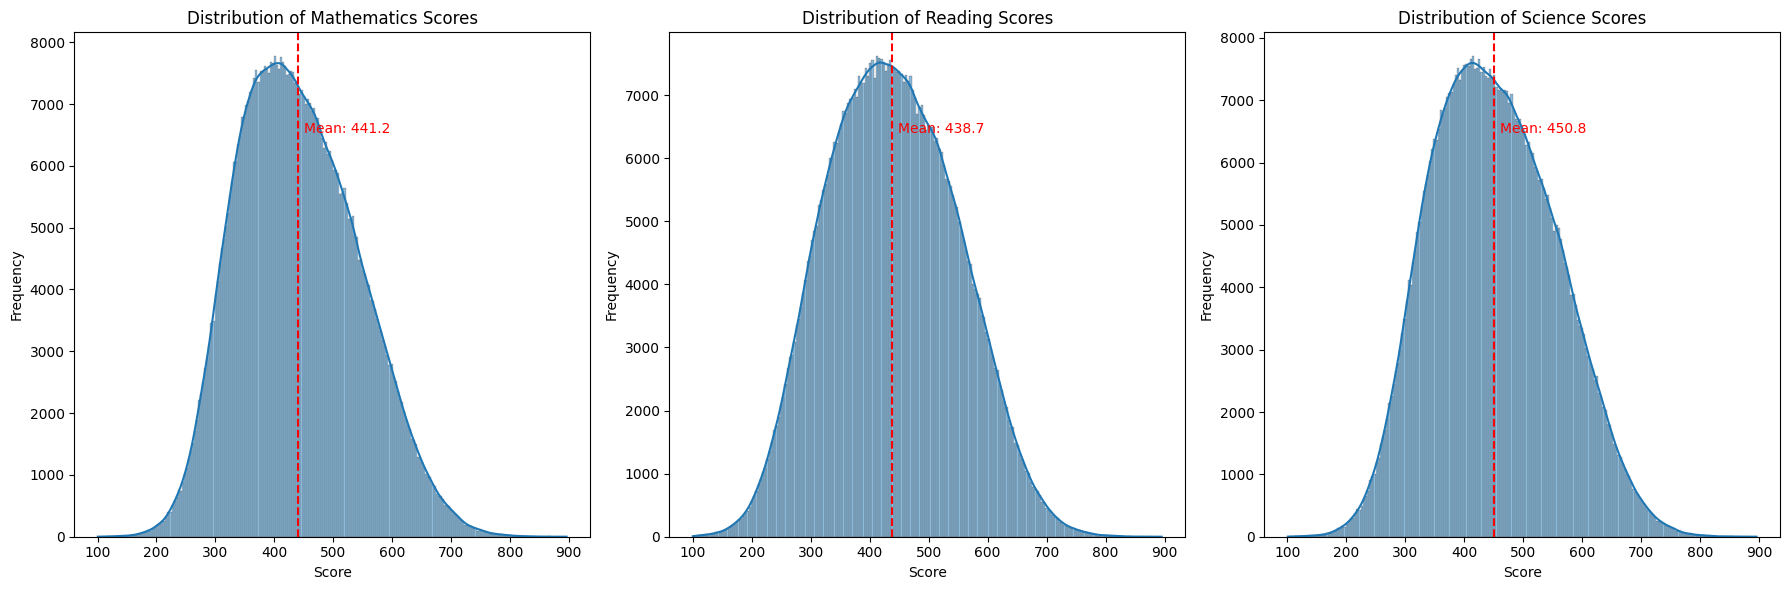

In [ ]:
def plot_performance_distributions(df):
    """Plot histograms of PISA performance scores"""
    performance_vars = ['PV1MATH', 'PV1READ', 'PV1SCIE']
    titles = ['Mathematics', 'Reading', 'Science']
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    for i, (var, title) in enumerate(zip(performance_vars, titles)):
        sns.histplot(df[var], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {title} Scores')
        axes[i].set_xlabel('Score')
        axes[i].set_ylabel('Frequency')
        
        # Add mean line
        mean_val = df[var].mean()
        axes[i].axvline(mean_val, color='red', linestyle='--')
        axes[i].text(mean_val + 10, 0.8 * axes[i].get_ylim()[1], 
                    f'Mean: {mean_val:.1f}', color='red')
    
    plt.tight_layout()
    plt.savefig('outputs/plots/performance_distributions.png')
    plt.show()

plot_performance_distributions(student_df)

### Observations: 
- Comment on shape of distributions
- Note any patterns or unusual aspects

### 4.2 Socioeconomic Status Analysis


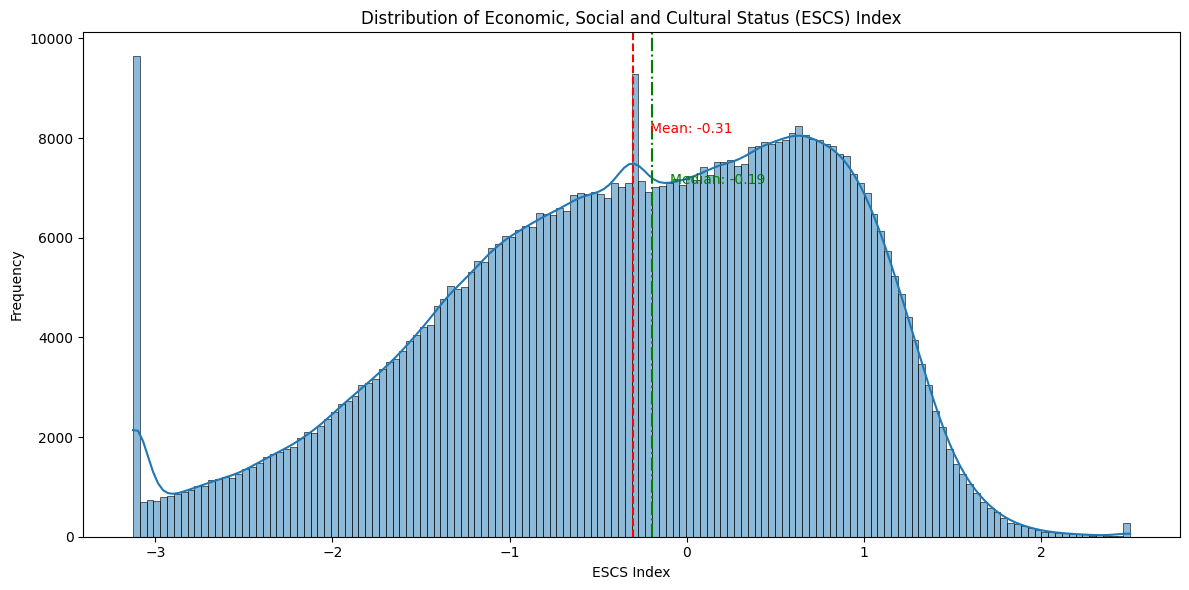

In [ ]:
def plot_escs_distribution(df):
    """Plot histogram of ESCS index"""
    plt.figure(figsize=(12, 6))
    
    sns.histplot(df['ESCS'], kde=True)
    plt.title('Distribution of Economic, Social and Cultural Status (ESCS) Index')
    plt.xlabel('ESCS Index')
    plt.ylabel('Frequency')
    
    # Add mean and median lines
    mean_val = df['ESCS'].mean()
    median_val = df['ESCS'].median()
    
    plt.axvline(mean_val, color='red', linestyle='--')
    plt.axvline(median_val, color='green', linestyle='-.')
    
    plt.text(mean_val + 0.1, 0.8 * plt.ylim()[1], f'Mean: {mean_val:.2f}', color='red')
    plt.text(median_val + 0.1, 0.7 * plt.ylim()[1], f'Median: {median_val:.2f}', color='green')
    
    plt.tight_layout()
    plt.savefig('outputs/plots/escs_distribution.png')
    plt.show()

plot_escs_distribution(student_df)
# Observations: 
# - Comment on shape of distribution
# - Note any skewness or unusual patterns

# COUNTPLOT: Student distribution by gender


### 4.3 Gender Analysis

C:\Users\obada\AppData\Local\Temp\ipykernel_3720\1191360063.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['gender'] = df['ST004D01T'].map(gender_map)


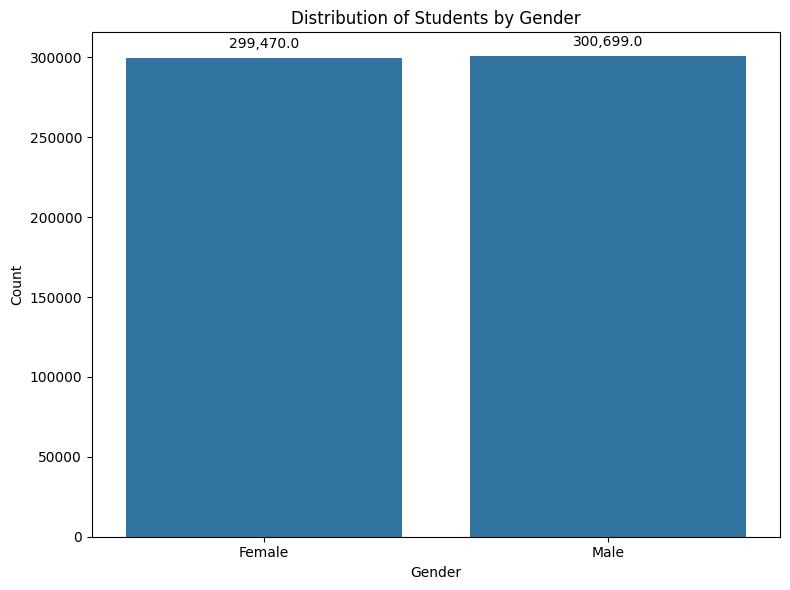

In [ ]:
def plot_gender_distribution(df):
    """Plot count of students by gender"""
    plt.figure(figsize=(8, 6))
    
    # Map gender codes to labels
    gender_map = {1: 'Female', 2: 'Male'}
    df['gender'] = df['ST004D01T'].map(gender_map)
    
    sns.countplot(x='gender', data=df)
    plt.title('Distribution of Students by Gender')
    plt.xlabel('Gender')
    plt.ylabel('Count')
    
    # Add count labels on bars
    for p in plt.gca().patches:
        plt.gca().annotate(f'{p.get_height():,}', 
                          (p.get_x() + p.get_width() / 2., p.get_height()),
                          ha = 'center', va = 'center', 
                          xytext = (0, 10), textcoords = 'offset points')
    
    plt.tight_layout()
    plt.savefig('outputs/plots/gender_distribution.png')
    plt.show()

# Execute the function
plot_gender_distribution(student_df)
# Observations:
# - Comment on gender balance in the dataset

# BAR CHART: Top-performing countries in mathematics

### 4.4 Country-Level Analysis

C:\Users\obada\AppData\Local\Temp\ipykernel_3720\3553662175.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_math = df.groupby('CNT')['PV1MATH'].mean().sort_values(ascending=False)


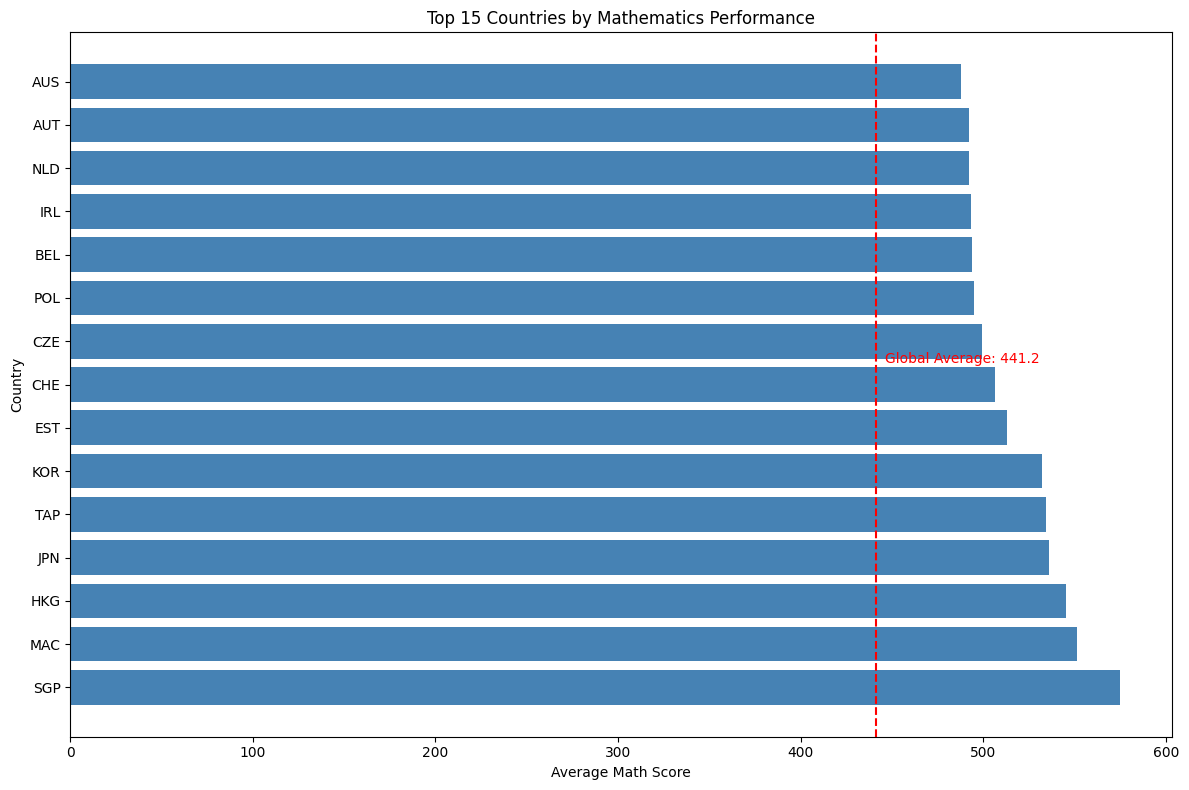

In [ ]:
def plot_top_countries_math(df, top_n=15):
    """Plot bar chart of top countries by math performance"""
    # Calculate mean math score by country
    country_math = df.groupby('CNT')['PV1MATH'].mean().sort_values(ascending=False)
    
    # Select only the top n countries
    top_countries = country_math.head(top_n)
    
    # Create figure with specific size
    plt.figure(figsize=(12, 8))
    
    # Use matplotlib's barh for horizontal bar chart instead of seaborn
    plt.barh(y=range(len(top_countries)), width=top_countries.values, color='steelblue')
    
    # Set y-ticks to be the country codes
    plt.yticks(range(len(top_countries)), top_countries.index)
    
    plt.title(f'Top {top_n} Countries by Mathematics Performance')
    plt.xlabel('Average Math Score')
    plt.ylabel('Country')
    
    # Add global average line
    global_avg = df['PV1MATH'].mean()
    plt.axvline(global_avg, color='red', linestyle='--')
    plt.text(global_avg + 5, len(top_countries)/2, f'Global Average: {global_avg:.1f}', color='red')
    
    plt.tight_layout()
    plt.savefig('outputs/plots/top_countries_math.png')
    plt.show()

# Execute the function
plot_top_countries_math(student_df)

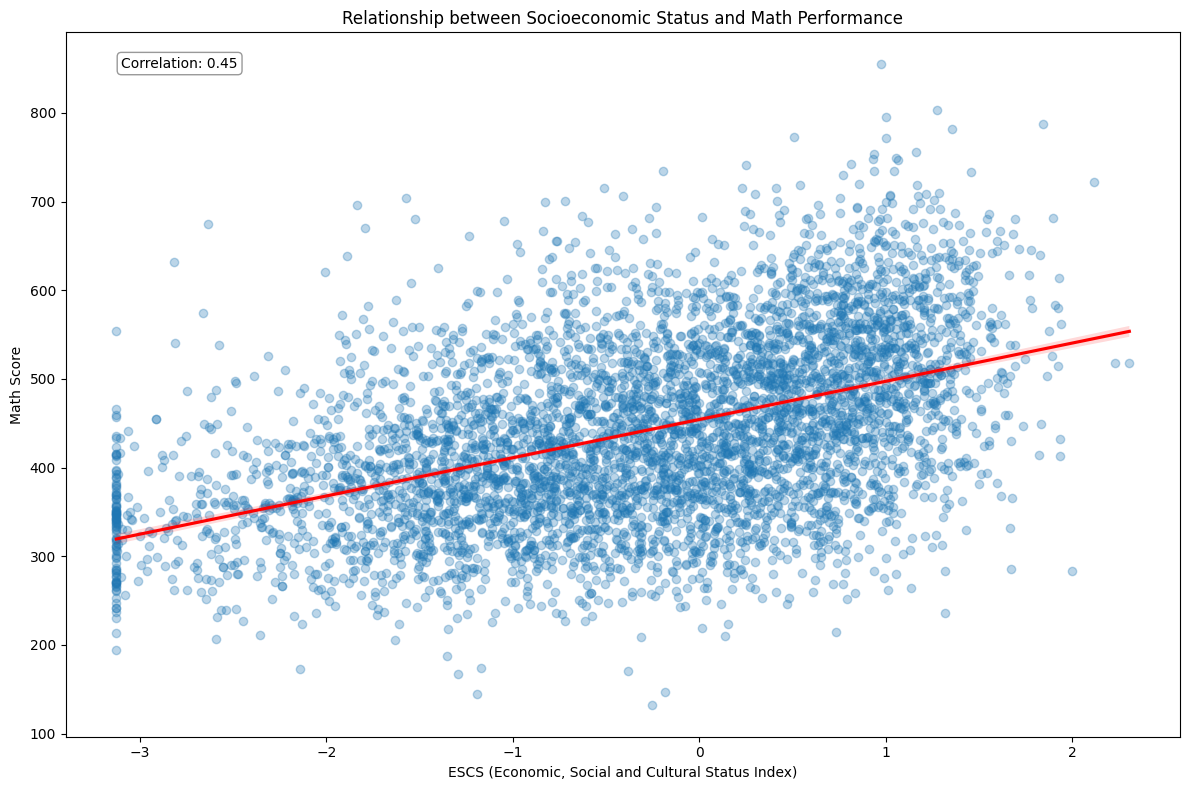

In [ ]:

# =========================================================
# 3. BIVARIATE EXPLORATION
# =========================================================

# SCATTER PLOT: Relationship between ESCS and Math Performance

def plot_escs_math_relationship(df, sample_size=5000):
    """Plot scatter plot of ESCS vs Math performance"""
    # Take a random sample to make plotting faster if dataset is large
    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
    else:
        sample_df = df
    
    plt.figure(figsize=(12, 8))
    
    sns.regplot(x='ESCS', y='PV1MATH', data=sample_df, 
                scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
    
    plt.title('Relationship between Socioeconomic Status and Math Performance')
    plt.xlabel('ESCS (Economic, Social and Cultural Status Index)')
    plt.ylabel('Math Score')
    
    # Add correlation coefficient
    corr = df['ESCS'].corr(df['PV1MATH'])
    plt.annotate(f'Correlation: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('outputs/plots/escs_math_relationship.png')
    plt.show()

# Execute the function
plot_escs_math_relationship(student_df)
# Observations:
# - Comment on the strength and direction of the relationship
# - Note any patterns or unusual observations



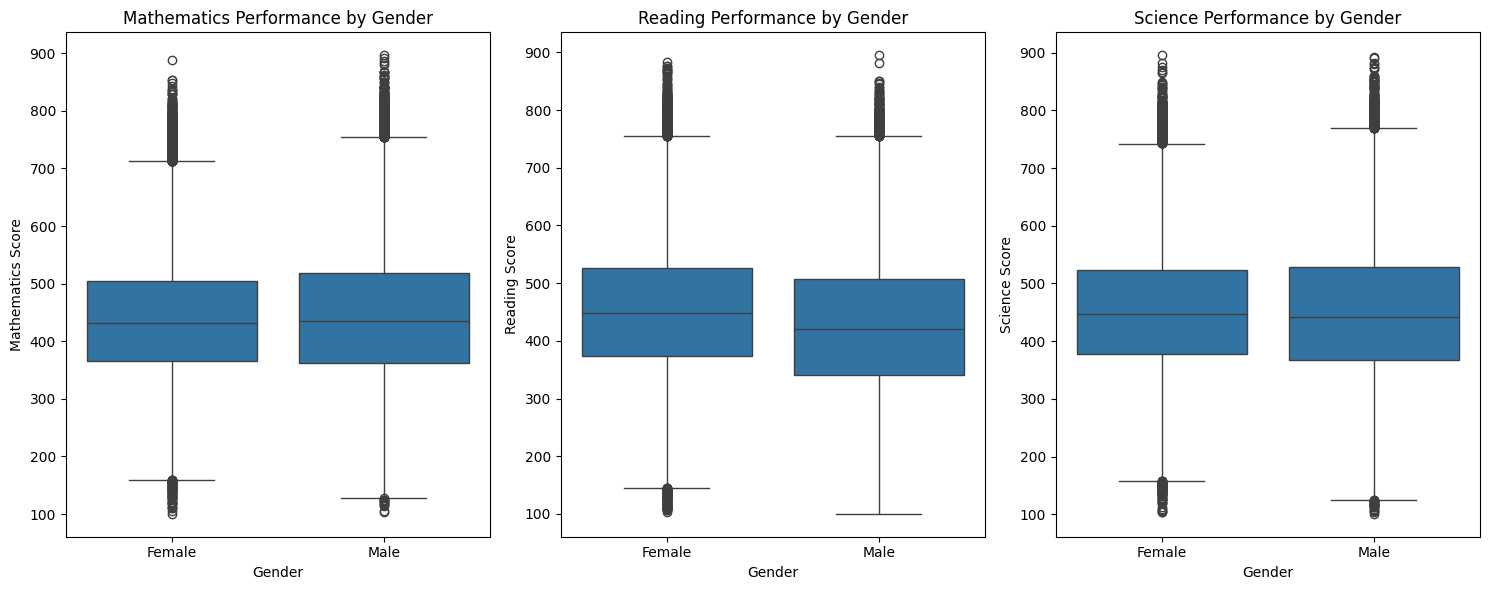

In [ ]:
# BOX PLOT: Performance by Gender
def plot_performance_by_gender(df):
    """Plot box plots of performance by gender"""
    # Map gender codes to labels
    gender_map = {1: 'Female', 2: 'Male'}
    df['gender'] = df['ST004D01T'].map(gender_map)
    
    # Reshape data for plotting
    perf_vars = ['PV1MATH', 'PV1READ', 'PV1SCIE']
    perf_titles = ['Mathematics', 'Reading', 'Science']
    
    plt.figure(figsize=(15, 6))
    
    for i, (var, title) in enumerate(zip(perf_vars, perf_titles)):
        plt.subplot(1, 3, i+1)
        sns.boxplot(x='gender', y=var, data=df)
        plt.title(f'{title} Performance by Gender')
        plt.xlabel('Gender')
        plt.ylabel(f'{title} Score')
    
    plt.tight_layout()
    plt.savefig('outputs/plots/performance_by_gender.png')
    plt.show()

# Execute the function
plot_performance_by_gender(student_df)
# Observations:
# - Comment on gender differences across subjects
# - Note which differences appear most pronounced


C:\Users\obada\AppData\Local\Temp\ipykernel_3720\2640535266.py:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['immigrant_status'] = df['IMMIG'].map(immig_map)


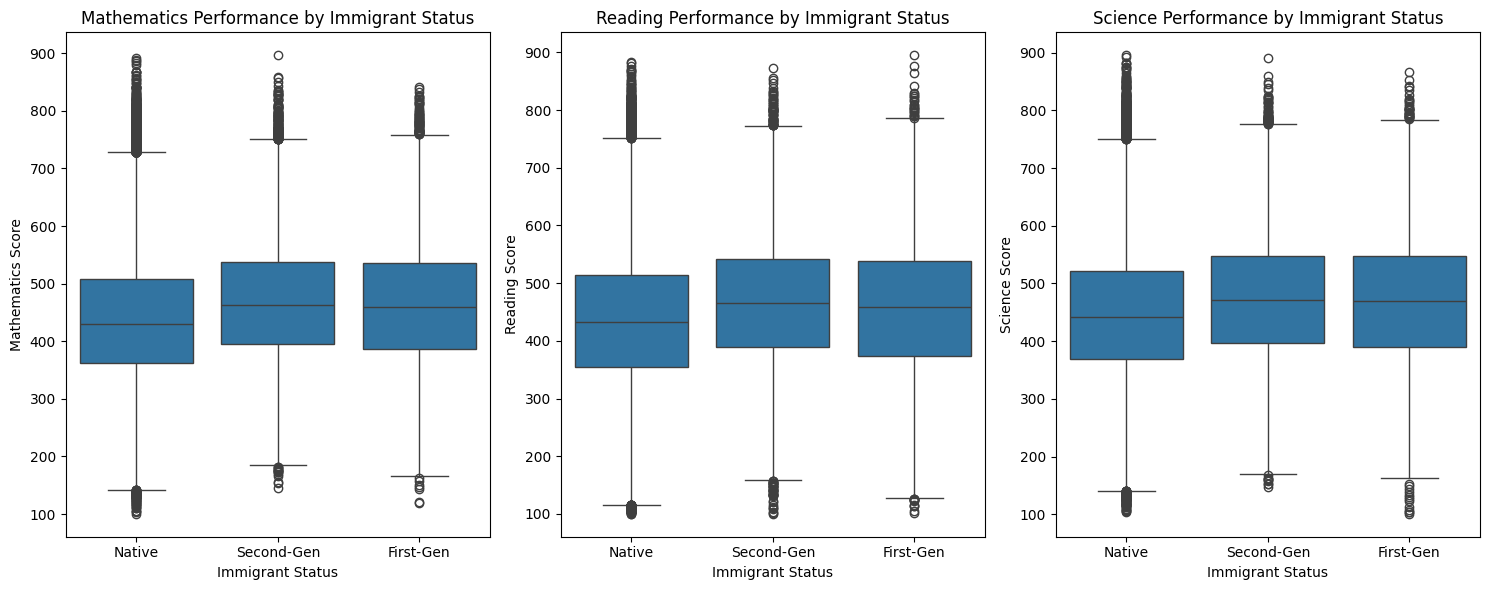

In [ ]:
# BOX PLOT: Performance by Immigrant Status

def plot_performance_by_immigrant(df):
    """Plot box plots of performance by immigrant status"""
    # Map immigrant status codes to labels
    immig_map = {1: 'Native', 2: 'Second-Gen', 3: 'First-Gen'}
    df['immigrant_status'] = df['IMMIG'].map(immig_map)
    
    # Reshape data for plotting
    plt.figure(figsize=(15, 6))
    
    for i, (var, title) in enumerate(zip(['PV1MATH', 'PV1READ', 'PV1SCIE'], 
                                        ['Mathematics', 'Reading', 'Science'])):
        plt.subplot(1, 3, i+1)
        sns.boxplot(x='immigrant_status', y=var, data=df)
        plt.title(f'{title} Performance by Immigrant Status')
        plt.xlabel('Immigrant Status')
        plt.ylabel(f'{title} Score')
    
    plt.tight_layout()
    plt.savefig('outputs/plots/performance_by_immigrant.png')
    plt.show()

# Execute the function if immigrant status data is available
if 'IMMIG' in student_df.columns:
    plot_performance_by_immigrant(student_df)
# Observations:
# - Comment on performance differences by immigrant status
# - Note which subjects show largest gaps

### 4.5 Advanced Analysis: Multiple Factors

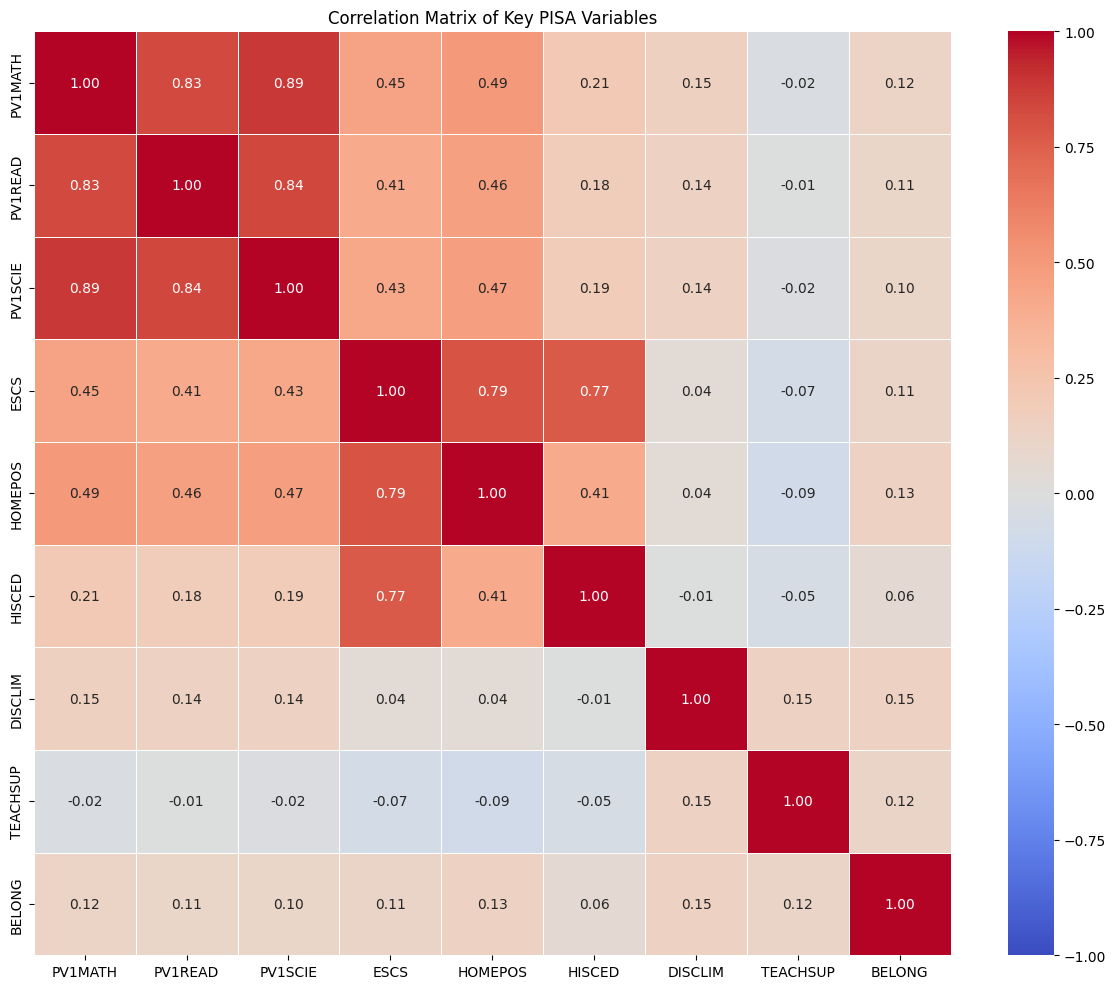

In [ ]:

# HEATMAP: Correlation between key variables

def plot_correlation_heatmap(df):
    """Plot correlation heatmap of key variables"""
    # Select relevant variables
    key_vars = [
        'PV1MATH', 'PV1READ', 'PV1SCIE',  # Performance
        'ESCS', 'HOMEPOS', 'HISCED',      # Socioeconomic
        'DISCLIM', 'TEACHSUP', 'BELONG'   # School climate
    ]
    
    # Filter to variables that exist in the dataframe
    available_vars = [var for var in key_vars if var in df.columns]
    
    # Calculate correlation matrix
    corr_matrix = df[available_vars].corr()
    
    plt.figure(figsize=(12, 10))
    
    # Create heatmap
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', 
                linewidths=0.5, vmin=-1, vmax=1)
    
    plt.title('Correlation Matrix of Key PISA Variables')
    plt.tight_layout()
    plt.savefig('outputs/plots/correlation_heatmap.png')
    plt.show()

# Execute the function
plot_correlation_heatmap(student_df)
# Observations:
# - Comment on strongest correlations
# - Note any surprising patterns

C:\Users\obada\AppData\Local\Temp\ipykernel_3720\3643017187.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_gender_perf = df.groupby(['CNT', 'gender'])[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean().reset_index()


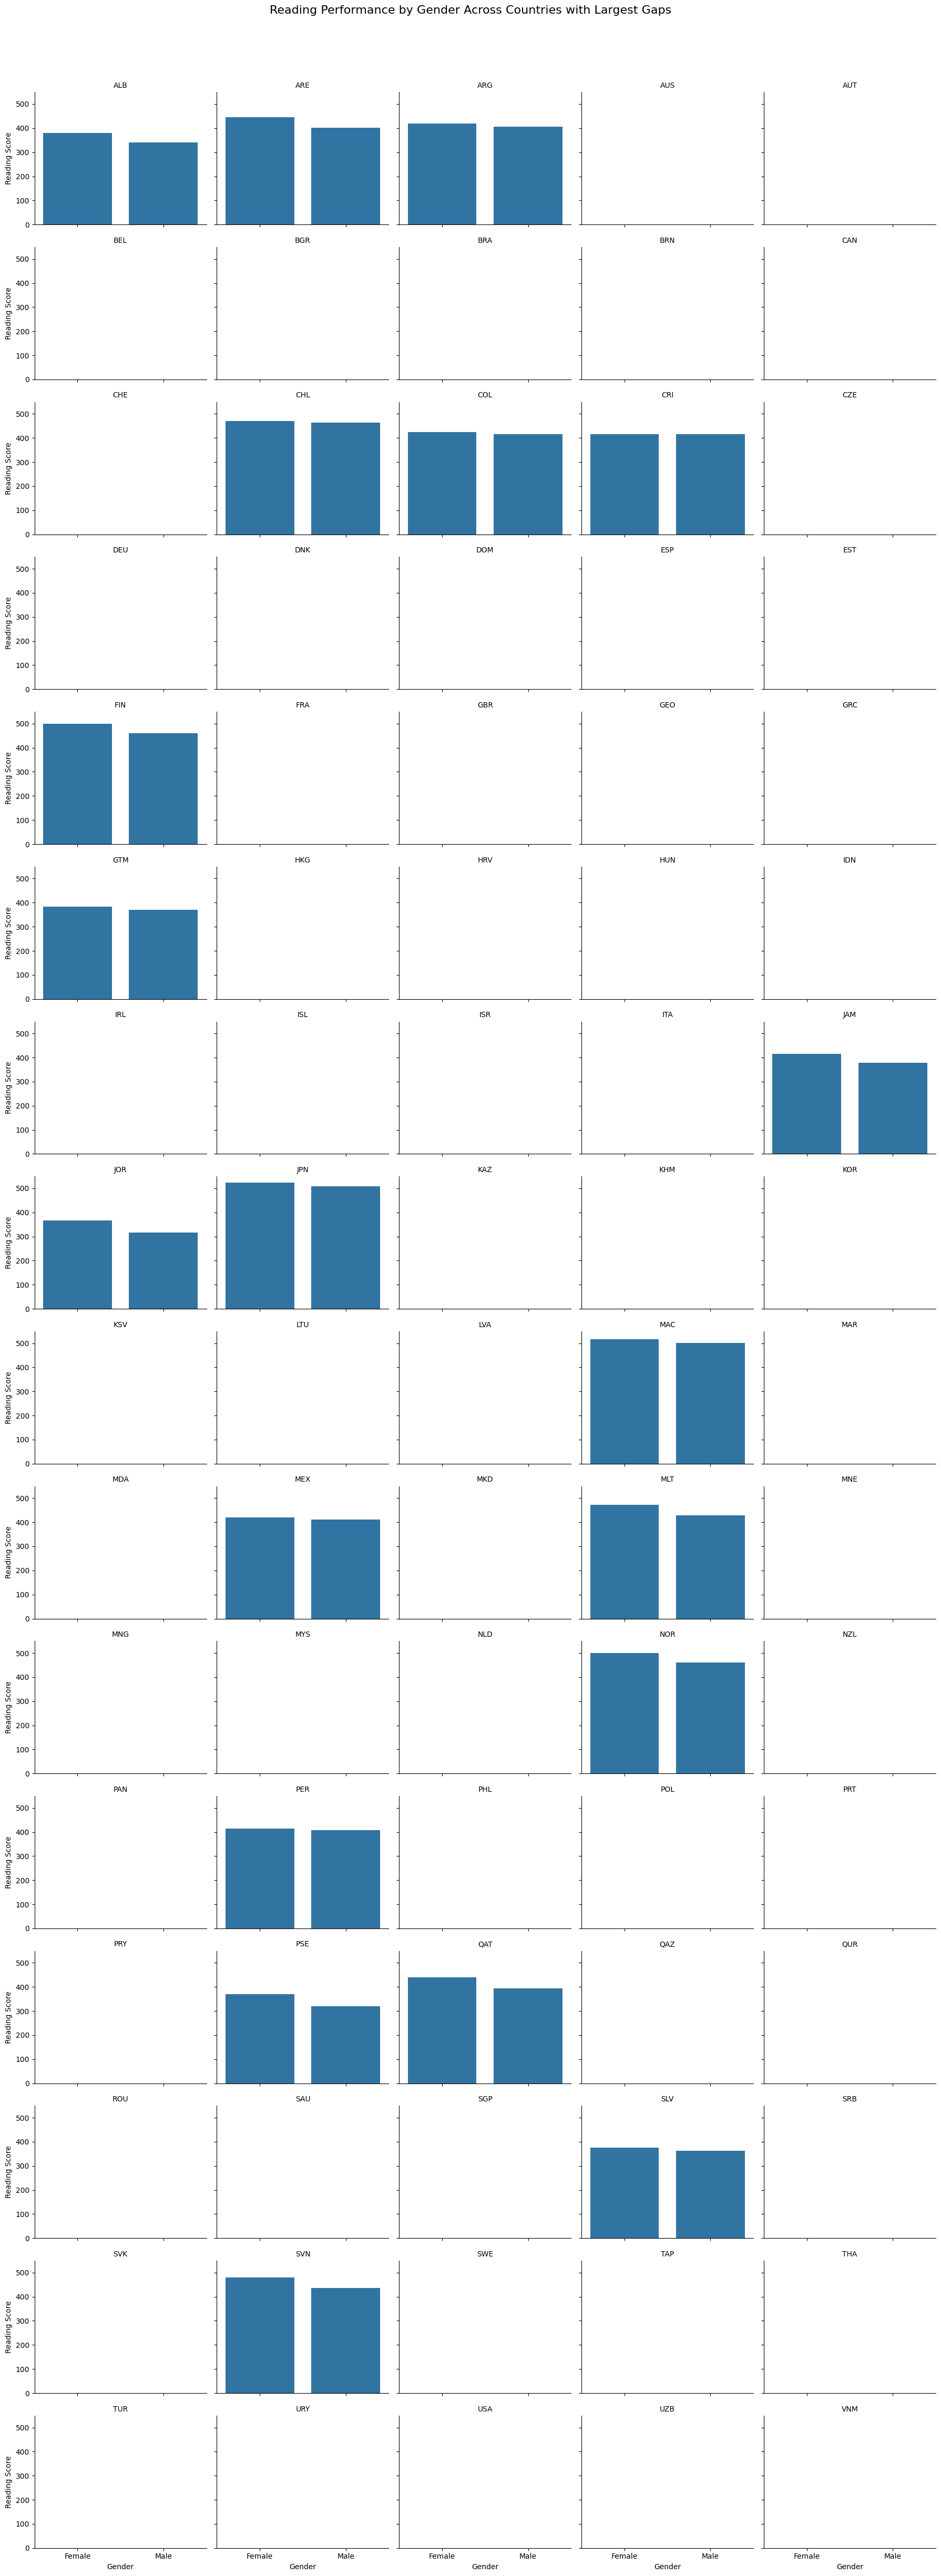

In [ ]:
# =========================================================
# 4. MULTIVARIATE EXPLORATION
# =========================================================

# FACET PLOT: Performance by gender across countries

def plot_gender_gap_by_country(df, top_n=10):
    """Plot gender performance gaps across top countries"""
    # Calculate mean performance by country and gender
    gender_map = {1: 'Female', 2: 'Male'}
    df['gender'] = df['ST004D01T'].map(gender_map)
    
    country_gender_perf = df.groupby(['CNT', 'gender'])[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean().reset_index()
    
    # Calculate gender gap (male - female)
    wide_format = country_gender_perf.pivot(index='CNT', columns='gender', 
                                           values=['PV1MATH', 'PV1READ', 'PV1SCIE'])
    
    # Calculate absolute gender gaps
    gender_gaps = pd.DataFrame({
        'Math Gap': wide_format[('PV1MATH', 'Male')] - wide_format[('PV1MATH', 'Female')],
        'Reading Gap': wide_format[('PV1READ', 'Male')] - wide_format[('PV1READ', 'Female')],
        'Science Gap': wide_format[('PV1SCIE', 'Male')] - wide_format[('PV1SCIE', 'Female')]
    })
    
    # Select countries with largest reading gaps (both directions)
    reading_gap_countries = gender_gaps.sort_values('Reading Gap').index
    top_female_adv = reading_gap_countries[:top_n]  # Female advantage
    top_male_adv = reading_gap_countries[-top_n:]   # Male advantage
    highlighted_countries = pd.Index(top_female_adv.tolist() + top_male_adv.tolist())
    
    # Filter data for selected countries
    plot_data = country_gender_perf[country_gender_perf['CNT'].isin(highlighted_countries)]
    
    # Create facet plot
    g = sns.FacetGrid(plot_data, col='CNT', col_wrap=5, height=3, aspect=1.2)
    g.map_dataframe(sns.barplot, x='gender', y='PV1READ')
    g.set_axis_labels('Gender', 'Reading Score')
    g.set_titles('{col_name}')
    g.fig.suptitle('Reading Performance by Gender Across Countries with Largest Gaps', 
                  fontsize=16, y=1.02)
    
    plt.tight_layout()
    plt.savefig('outputs/plots/gender_gap_by_country.png')
    plt.show()

# Execute the function
plot_gender_gap_by_country(student_df)
# Observations:
# - Comment on countries with largest gender gaps
# - Note directions of the gaps (which gender has advantage in which countries)

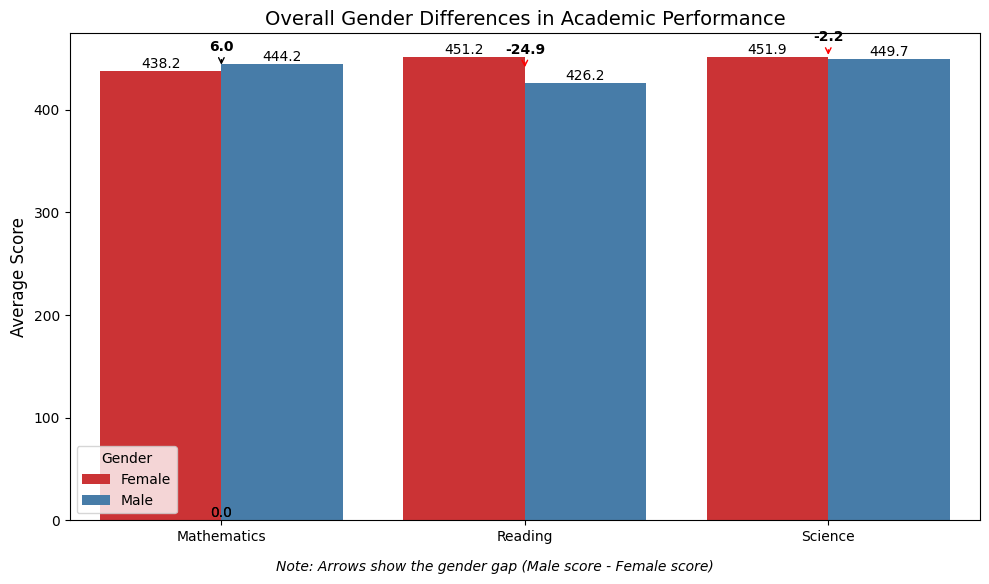

In [ ]:
def plot_overall_gender_difference(df):
    """Plot overall gender differences across all subjects"""
    # Map gender codes to labels
    gender_map = {1: 'Female', 2: 'Male'}
    df['gender'] = df['ST004D01T'].map(gender_map)
    
    # Calculate mean performance by gender across all subjects
    gender_perf = df.groupby('gender')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean().reset_index()
    
    # Reshape data for better plotting
    plot_data = pd.melt(gender_perf, 
                        id_vars=['gender'],
                        value_vars=['PV1MATH', 'PV1READ', 'PV1SCIE'],
                        var_name='Subject', 
                        value_name='Score')
    
    # Rename subjects for better readability
    subject_map = {
        'PV1MATH': 'Mathematics',
        'PV1READ': 'Reading',
        'PV1SCIE': 'Science'
    }
    plot_data['Subject'] = plot_data['Subject'].map(subject_map)
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    
    # Use barplot with hue for gender
    ax = sns.barplot(x='Subject', y='Score', hue='gender', data=plot_data, palette='Set1')
    
    # Add value labels on top of each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.1f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)
    
    # Calculate and display gender gaps
    for subject in subject_map.values():
        male_score = plot_data[(plot_data['Subject'] == subject) & (plot_data['gender'] == 'Male')]['Score'].values[0]
        female_score = plot_data[(plot_data['Subject'] == subject) & (plot_data['gender'] == 'Female')]['Score'].values[0]
        gap = male_score - female_score
        
        # Position the text in the middle of the bars
        x_pos = list(subject_map.values()).index(subject)
        y_pos = (male_score + female_score) / 2
        
        # Add the gap text with arrow
        gap_text = f"{gap:.1f}" if gap >= 0 else f"{gap:.1f}"
        plt.annotate(gap_text, xy=(x_pos, y_pos), xytext=(x_pos, y_pos + 20),
                    ha='center', va='center',
                    arrowprops=dict(arrowstyle='->',
                                   color='black' if gap >= 0 else 'red'),
                    fontweight='bold')
    
    # Set plot title and labels
    plt.title('Overall Gender Differences in Academic Performance', fontsize=14)
    plt.ylabel('Average Score', fontsize=12)
    plt.xlabel('', fontsize=12)  # Empty label for x-axis
    
    # Add a note about the gap arrows
    plt.figtext(0.5, 0.01, 'Note: Arrows show the gender gap (Male score - Female score)', 
               ha='center', fontsize=10, style='italic')
    
    # Customize legend
    plt.legend(title='Gender')
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.97])  # Adjust layout to make room for the note
    plt.savefig('outputs/plots/overall_gender_difference.png')
    plt.show()

# Execute the function
plot_overall_gender_difference(student_df)

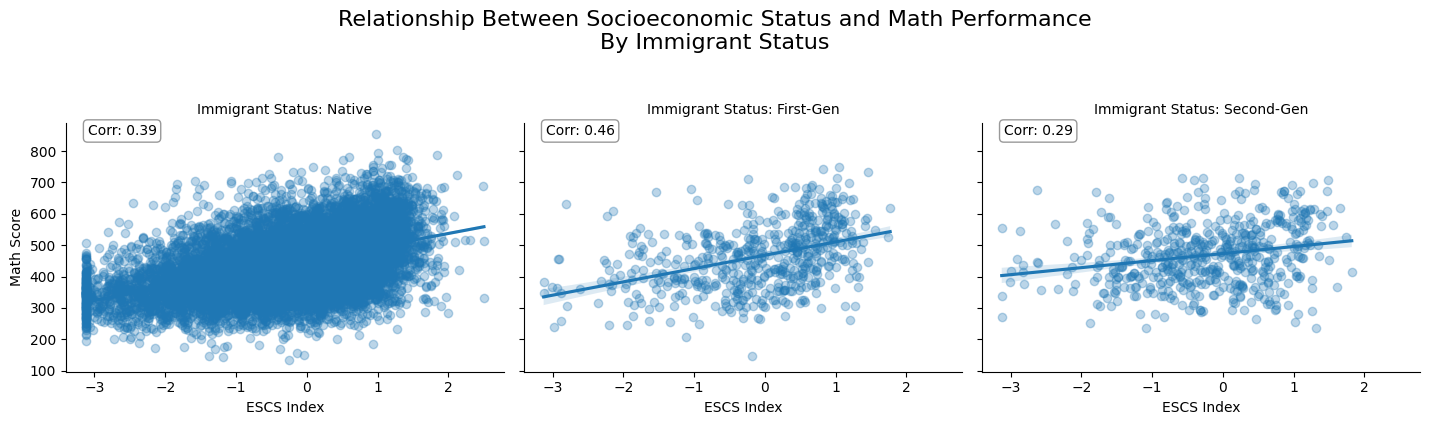

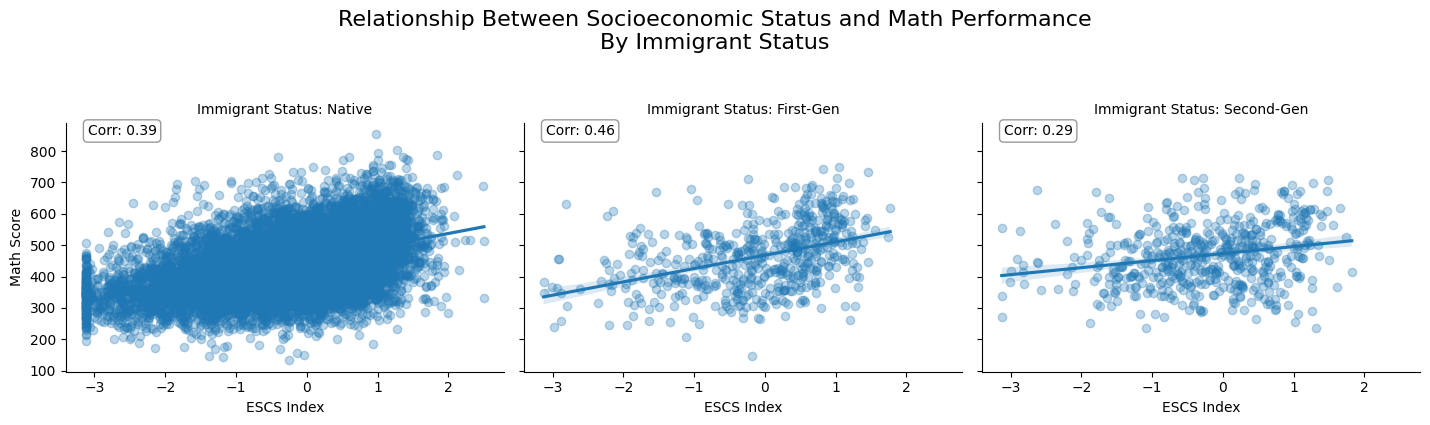

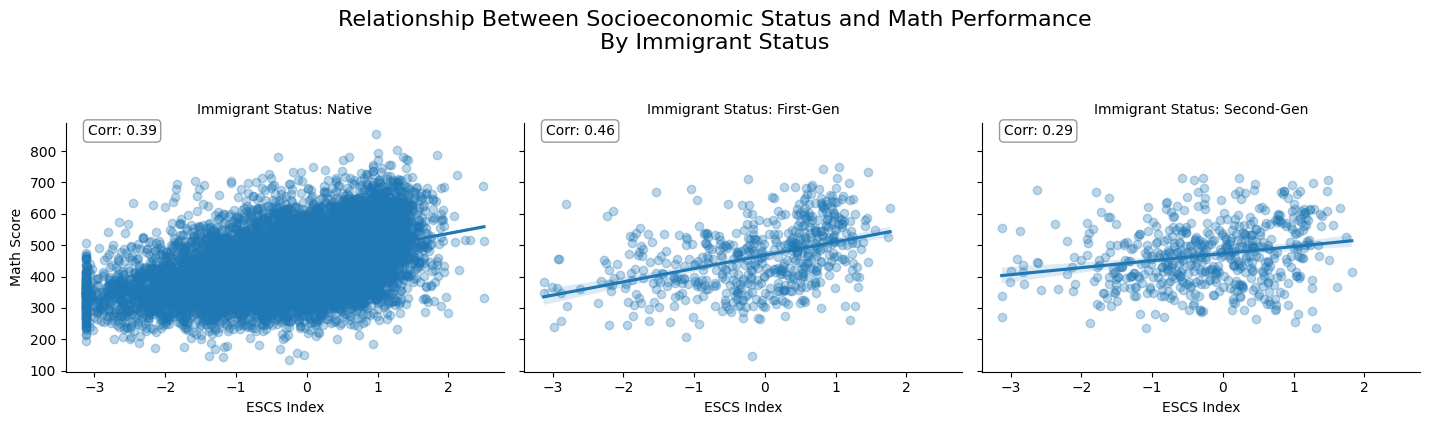

In [ ]:
# FACET PLOT: Relationship between ESCS and Math performance by immigrant status

def plot_escs_math_by_immigrant(df, sample_size=10000):
    """Plot relationship between ESCS and Math by immigrant status"""
    # Ensure 'IMMIG' column contains only numeric values
    df['IMMIG'] = pd.to_numeric(df['IMMIG'], errors='coerce')
    
    # Map immigrant status codes to labels
    immig_map = {1: 'Native', 2: 'Second-Gen', 3: 'First-Gen'}
    df['immigrant_status'] = df['IMMIG'].map(immig_map)
    
    # Sample data if needed
    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
    else:
        sample_df = df
    
    # Create facet plot
    g = sns.FacetGrid(sample_df, col='immigrant_status', height=4, aspect=1.2)
    g.map_dataframe(sns.regplot, x='ESCS', y='PV1MATH', scatter_kws={'alpha': 0.3})
    
    # Add correlation coefficients
    for i, immigrant_status in enumerate(sorted(df['immigrant_status'].dropna().unique())):
        subset = df[df['immigrant_status'] == immigrant_status]
        corr = subset['ESCS'].corr(subset['PV1MATH'])
        g.axes[0, i].annotate(f'Corr: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    g.set_axis_labels('ESCS Index', 'Math Score')
    g.set_titles('Immigrant Status: {col_name}')
    g.fig.suptitle('Relationship Between Socioeconomic Status and Math Performance\nBy Immigrant Status', 
                   fontsize=16, y=1.05)
    
    plt.tight_layout()
    plt.savefig('outputs/plots/escs_math_by_immigrant.png')
    plt.show()

# Execute the function if immigrant status data is available
if 'IMMIG' in student_df.columns:
    plot_escs_math_by_immigrant(student_df)
# Observations:
# - Comment on differences in ESCS-performance relationship across immigrant groups
# - Note any variations in strength of relationship
# Observations:
# - Comment on differences in ESCS-performance relationship across immigrant groups
# - Note any variations in strength of relationship FACET PLOT: Relationship between ESCS and Math performance by immigrant status

def plot_escs_math_by_immigrant(df, sample_size=10000):
    """Plot relationship between ESCS and Math by immigrant status"""
    # Ensure 'IMMIG' column contains only numeric values
    df['IMMIG'] = pd.to_numeric(df['IMMIG'], errors='coerce')
    
    # Map immigrant status codes to labels
    immig_map = {1: 'Native', 2: 'Second-Gen', 3: 'First-Gen'}
    df['immigrant_status'] = df['IMMIG'].map(immig_map)
    
    # Sample data if needed
    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
    else:
        sample_df = df
    
    # Create facet plot
    g = sns.FacetGrid(sample_df, col='immigrant_status', height=4, aspect=1.2)
    g.map_dataframe(sns.regplot, x='ESCS', y='PV1MATH', scatter_kws={'alpha': 0.3})
    
    # Add correlation coefficients
    for i, immigrant_status in enumerate(sorted(df['immigrant_status'].dropna().unique())):
        subset = df[df['immigrant_status'] == immigrant_status]
        corr = subset['ESCS'].corr(subset['PV1MATH'])
        g.axes[0, i].annotate(f'Corr: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    g.set_axis_labels('ESCS Index', 'Math Score')
    g.set_titles('Immigrant Status: {col_name}')
    g.fig.suptitle('Relationship Between Socioeconomic Status and Math Performance\nBy Immigrant Status', 
                   fontsize=16, y=1.05)
    
    plt.tight_layout()
    plt.savefig('outputs/plots/escs_math_by_immigrant.png')
    plt.show()

# Execute the function if immigrant status data is available
if 'IMMIG' in student_df.columns:
    plot_escs_math_by_immigrant(student_df)
# Observations:
# - Comment on differences in ESCS-performance relationship across immigrant groups
# - Note any variations in strength of relationship FACET PLOT: Relationship between ESCS and Math performance by immigrant status

def plot_escs_math_by_immigrant(df, sample_size=10000):
    """Plot relationship between ESCS and Math by immigrant status"""
    # Ensure 'IMMIG' column contains only numeric values
    df['IMMIG'] = pd.to_numeric(df['IMMIG'], errors='coerce')
    
    # Map immigrant status codes to labels
    immig_map = {1: 'Native', 2: 'Second-Gen', 3: 'First-Gen'}
    df['immigrant_status'] = df['IMMIG'].map(immig_map)
    
    # Sample data if needed
    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
    else:
        sample_df = df
    
    # Create facet plot
    g = sns.FacetGrid(sample_df, col='immigrant_status', height=4, aspect=1.2)
    g.map_dataframe(sns.regplot, x='ESCS', y='PV1MATH', scatter_kws={'alpha': 0.3})
    
    # Add correlation coefficients
    for i, immigrant_status in enumerate(sorted(df['immigrant_status'].dropna().unique())):
        subset = df[df['immigrant_status'] == immigrant_status]
        corr = subset['ESCS'].corr(subset['PV1MATH'])
        g.axes[0, i].annotate(f'Corr: {corr:.2f}', xy=(0.05, 0.95), xycoords='axes fraction',
                           bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    g.set_axis_labels('ESCS Index', 'Math Score')
    g.set_titles('Immigrant Status: {col_name}')
    g.fig.suptitle('Relationship Between Socioeconomic Status and Math Performance\nBy Immigrant Status', 
                   fontsize=16, y=1.05)
    
    plt.tight_layout()
    plt.savefig('outputs/plots/escs_math_by_immigrant.png')
    plt.show()

# Execute the function if immigrant status data is available
if 'IMMIG' in student_df.columns:
    plot_escs_math_by_immigrant(student_df)
# Observations:
# - Comment on differences in ESCS-performance relationship across immigrant groups
# - Note any variations in strength of relationship

C:\Users\obada\AppData\Local\Temp\ipykernel_3720\3105796317.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  sample_df['ESCS_quartile'] = pd.qcut(sample_df['ESCS'], 4,


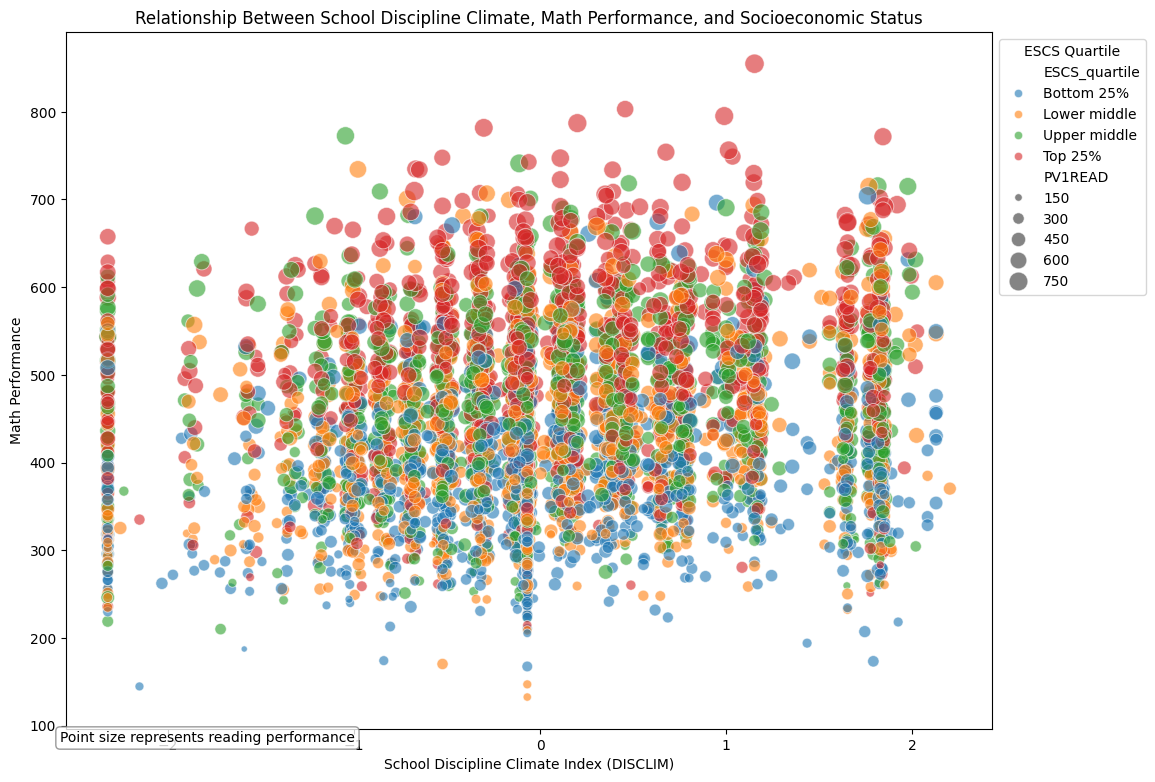

In [ ]:

# SCATTER PLOT with multiple encodings: Performance, ESCS, and School Climate

def plot_performance_escs_climate(df, sample_size=5000):
    """Plot scatter plot with multiple encodings for performance, ESCS, and school climate"""
    if 'DISCLIM' not in df.columns:
        print("School climate variable DISCLIM not found. Skipping visualization.")
        return
    
    # Sample data if needed
    if len(df) > sample_size:
        sample_df = df.sample(sample_size, random_state=42)
    else:
        sample_df = df
    
    # Create ESCS quartiles for color encoding
    sample_df['ESCS_quartile'] = pd.qcut(sample_df['ESCS'], 4, 
                                        labels=['Bottom 25%', 'Lower middle', 
                                                'Upper middle', 'Top 25%'])
    
    # Create plot
    plt.figure(figsize=(12, 8))
    
    scatter = sns.scatterplot(data=sample_df, x='DISCLIM', y='PV1MATH', 
                             hue='ESCS_quartile', size='PV1READ',
                             sizes=(20, 200), alpha=0.6)
    
    plt.title('Relationship Between School Discipline Climate, Math Performance, and Socioeconomic Status')
    plt.xlabel('School Discipline Climate Index (DISCLIM)')
    plt.ylabel('Math Performance')
    
    # Add a legend with a title
    handles, labels = scatter.get_legend_handles_labels()
    plt.legend(handles, labels, title='ESCS Quartile', loc='upper left', bbox_to_anchor=(1, 1))
    
    # Add annotations explaining the encodings
    plt.annotate('Point size represents reading performance', xy=(0.05, 0.05), 
                xycoords='figure fraction', bbox=dict(boxstyle="round,pad=0.3", 
                                                     fc="white", ec="gray", alpha=0.8))
    
    plt.tight_layout()
    plt.savefig('outputs/plots/performance_escs_climate.png')
    plt.show()

# Execute the function
plot_performance_escs_climate(student_df)
# Observations:
# - Comment on relationships between discipline climate and performance
# - Note how relationships may vary across ESCS quartiles

In [ ]:
# Part II: Explanatory Data Analysis

# =========================================================
# 5. EXPLANATORY VISUALIZATIONS
# =========================================================

# Based on findings from exploratory analysis, create 3-5 polished visualizations
# that effectively communicate key insights

def create_country_performance_map(df):
    """Create a choropleth map of math performance by country"""
    import geopandas as gpd
    from matplotlib.colors import LinearSegmentedColormap
    
    # Calculate average math performance by country
    country_math = df.groupby('CNT')['PV1MATH'].mean().reset_index()
    
    # Load world map data (you may need to install geopandas and download shapefile)
    try:
        world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
        
        # Perform necessary mapping between PISA country codes and map country codes
        # This would require a mapping dictionary from PISA country codes to ISO codes
        # For demonstration, we'll assume it exists
        
        # Example mapping code (would need to be customized):
        # country_math['iso_alpha'] = country_math['CNT'].map(pisa_to_iso_mapping)
        # world = world.merge(country_math, left_on='iso_a3', right_on='iso_alpha')
        
        # Create custom colormap
        cmap = LinearSegmentedColormap.from_list("math_performance", 
                                               ["#f7fbff", "#08306b"])
        
        # Plot the map
        fig, ax = plt.subplots(1, 1, figsize=(15, 10))
        world.plot(column='PV1MATH', cmap=cmap, linewidth=0.8, ax=ax, edgecolor='0.8')
        
        # Add a colorbar
        sm = plt.cm.ScalarMappable(cmap=cmap)
        sm.set_array([country_math['PV1MATH'].min(), country_math['PV1MATH'].max()])
        cbar = fig.colorbar(sm, ax=ax)
        cbar.set_label('Average Math Score')
        
        plt.title('PISA 2022 Mathematics Performance by Country', fontsize=16)
        plt.tight_layout()
        plt.savefig('outputs/plots/math_performance_map.png')
        plt.show()
    
    except Exception as e:
        print(f"Error creating performance map: {e}")
        print("Consider installing geopandas or using an alternative visualization.")

In [ ]:

def create_escs_impact_visualization(df):
    """Create visualization showing impact of ESCS on performance across countries"""
    # Calculate ESCS impact (correlation coefficient) by country
    countries = []
    correlations = []
    
    for country in df['CNT'].unique():
        country_data = df[df['CNT'] == country]
        
        if len(country_data) > 100:  # Ensure enough data points
            corr = country_data['ESCS'].corr(country_data['PV1MATH'])
            countries.append(country)
            correlations.append(corr)
    
    # Create DataFrame for plotting
    escs_impact = pd.DataFrame({'Country': countries, 'ESCS-Math Correlation': correlations})
    escs_impact = escs_impact.sort_values('ESCS-Math Correlation', ascending=False)
    
    # Plot top and bottom 15 countries
    top_n = 15
    plot_data = pd.concat([escs_impact.head(top_n), escs_impact.tail(top_n)])
    
    plt.figure(figsize=(12, 10))
    
    # Create horizontal bar chart
    bars = plt.barh(plot_data['Country'], plot_data['ESCS-Math Correlation'], 
                   color=plt.cm.RdYlBu(np.linspace(0, 1, len(plot_data))))
    
    # Add a vertical line at zero
    plt.axvline(x=0, color='black', linestyle='-', alpha=0.7)
    
    # Add labels and title
    plt.xlabel('Correlation Coefficient (ESCS vs. Math Performance)')
    plt.ylabel('Country')
    plt.title('Impact of Socioeconomic Status on Math Performance\nBy Country', fontsize=16)
    
    # Add text to explain interpretation
    plt.figtext(0.5, 0.01, 
               "Higher values indicate stronger relationship between socioeconomic status and performance", 
               ha="center", fontsize=12, bbox={"facecolor":"orange", "alpha":0.15, "pad":5})
    
    plt.tight_layout()
    plt.savefig('outputs/plots/escs_impact_by_country.png')
    plt.show()

In [ ]:
def create_gender_gap_visualization(df):
    """Create visualization of gender gaps across subjects"""
    # Map gender codes to labels
    gender_map = {1: 'Female', 2: 'Male'}
    df['gender'] = df['ST004D01T'].map(gender_map)
    
    # Calculate performance by gender and subject
    gender_perf = df.groupby('gender')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean().reset_index()
    
    # Reshape data for plotting
    gender_perf_long = pd.melt(gender_perf, id_vars=['gender'], 
                              value_vars=['PV1MATH', 'PV1READ', 'PV1SCIE'],
                              var_name='Subject', value_name='Score')
    
    # Map subject codes to readable names
    subject_map = {'PV1MATH': 'Mathematics', 'PV1READ': 'Reading', 'PV1SCIE': 'Science'}
    gender_perf_long['Subject'] = gender_perf_long['Subject'].map(subject_map)
    
    # Calculate global average for reference
    global_avg = {
        'Mathematics': df['PV1MATH'].mean(),
        'Reading': df['PV1READ'].mean(),
        'Science': df['PV1SCIE'].mean()
    }
    
    # Create figure
    plt.figure(figsize=(14, 8))
    
    # Create grouped bar chart
    ax = sns.barplot(x='Subject', y='Score', hue='gender', data=gender_perf_long, 
                    palette=['#FF9AA2', '#74C3E1'])
    
    # Add global average lines
    for subject, avg in global_avg.items():
        plt.plot([subject, subject], [avg, avg], 'ko--', alpha=0.7, markersize=10, 
                label='_nolegend_')
    
    # Add annotations for differences
    for subject in subject_map.values():
        female_score = gender_perf_long[(gender_perf_long['gender'] == 'Female') & 
                                      (gender_perf_long['Subject'] == subject)]['Score'].values[0]
        male_score = gender_perf_long[(gender_perf_long['gender'] == 'Male') & 
                                    (gender_perf_long['Subject'] == subject)]['Score'].values[0]
        diff = male_score - female_score
        
        # Position text above bars
        y_pos = max(female_score, male_score) + 10
        plt.text(list(subject_map.values()).index(subject), y_pos, 
                f"Diff: {diff:.1f}", ha='center', fontweight='bold',
                color='green' if diff > 0 else 'red')
    
    # Add labels and title
    plt.xlabel('Subject', fontsize=14)
    plt.ylabel('Average Score', fontsize=14)
    plt.title('Gender Performance Gaps Across Subjects in PISA 2022', fontsize=16)
    plt.legend(title='Gender')
    
    # Add explanatory note
    plt.figtext(0.5, 0.01, 
               "Positive differences indicate male advantage, negative differences indicate female advantage", 
               ha="center", fontsize=12, bbox={"facecolor":"lightgray", "alpha":0.5, "pad":5})
    
    plt.tight_layout()
    plt.savefig('outputs/plots/gender_gaps_across_subjects.png')
    plt.show()

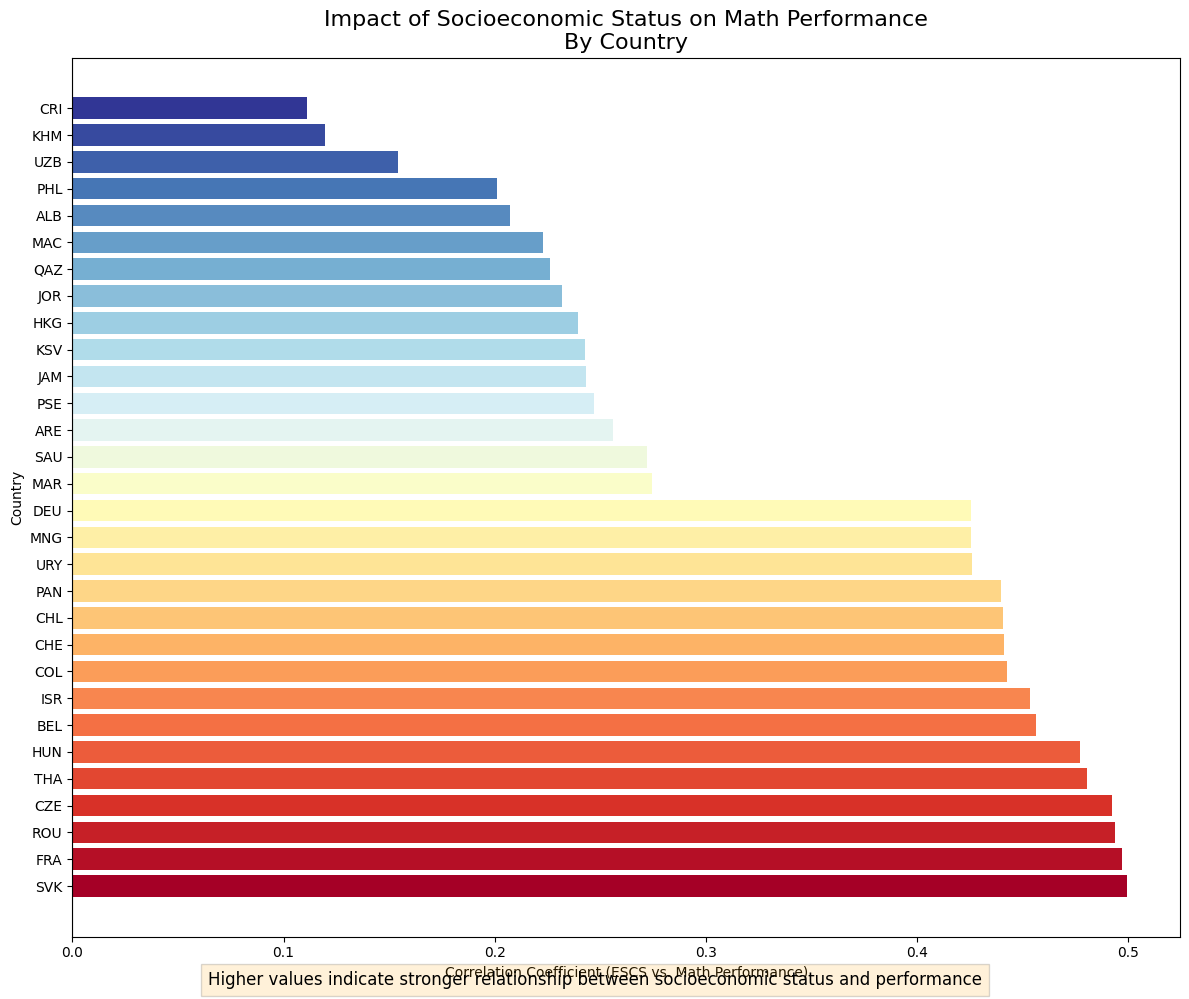

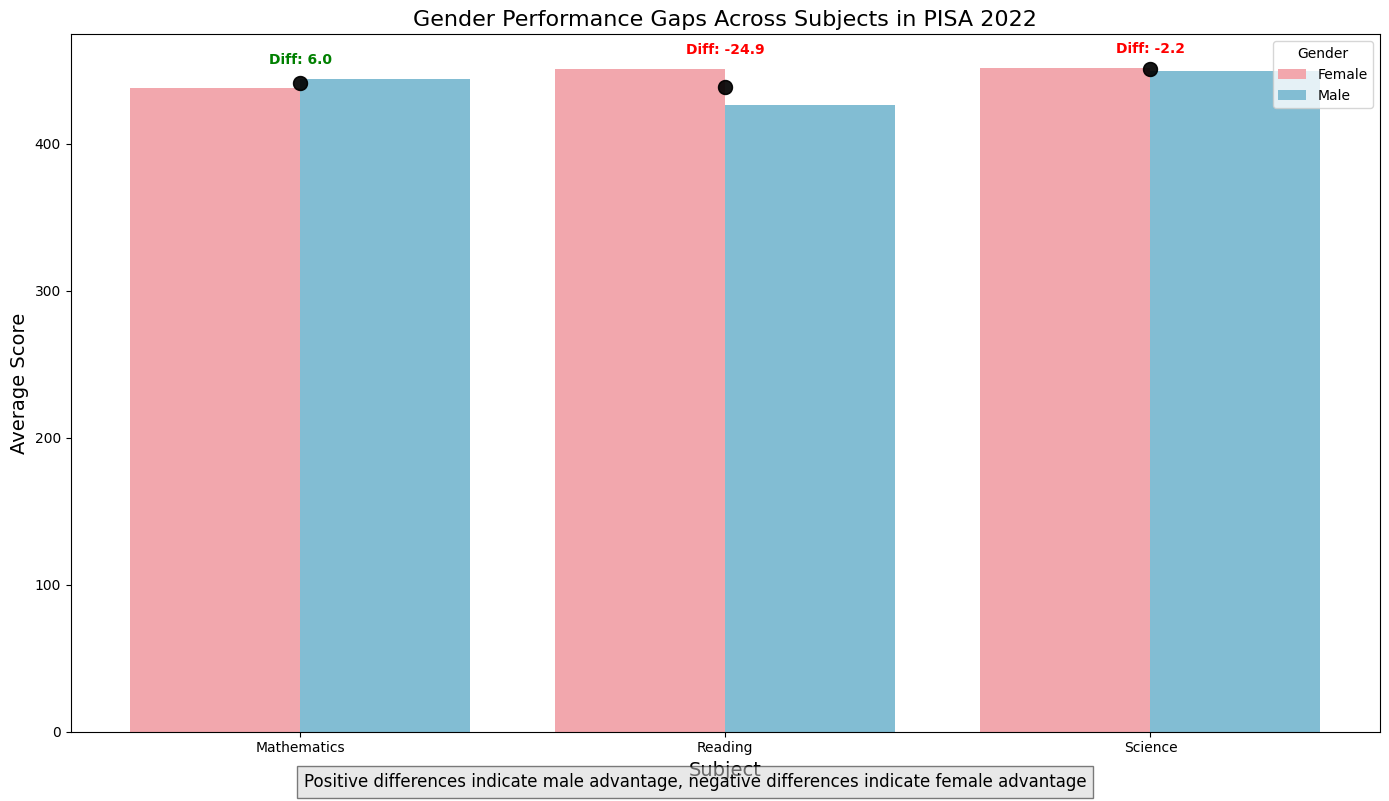

In [ ]:
create_escs_impact_visualization(student_df)
create_gender_gap_visualization(student_df)

# 5. Key Findings and Conclusions

## Research Question Answers

C:\Users\obada\AppData\Local\Temp\ipykernel_3720\3349978549.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_perf = df.groupby('CNT')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean()
C:\Users\obada\AppData\Local\Temp\ipykernel_3720\3349978549.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_gender_diff = df.groupby(['CNT', 'gender'])[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean()


Top 10 Countries by Overall Performance:
     Mathematics     Reading     Science     Overall  Overall Rank
CNT                                                               
SGP   574.742676  545.057129  561.316284  560.372009           1.0
MAC   551.627319  509.470490  543.045959  534.714600           2.0
JPN   535.844299  515.626465  545.874023  532.448242           3.0
KOR   532.065002  519.597412  531.260376  527.640930           4.0
HKG   545.577026  504.366638  524.970764  524.971436           5.0
TAP   534.530090  505.261322  527.423584  522.404968           6.0
EST   513.195740  514.967896  527.798767  518.654114           7.0
IRL   493.358246  518.533569  505.025726  505.639191           8.0
CZE   499.484772  499.987061  510.574432  503.348755           9.0
AUS   487.870972  500.173309  509.081757  499.042023          10.0

Top 10 Countries in Mathematics:
CNT
SGP    574.742676
MAC    551.627319
HKG    545.577026
JPN    535.844299
TAP    534.530090
KOR    532.065002
EST    51

C:\Users\obada\AppData\Local\Temp\ipykernel_3720\3349978549.py:149: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  country_avg = df.groupby('CNT')[['ESCS', 'PV1MATH', 'PV1READ', 'PV1SCIE']].mean()


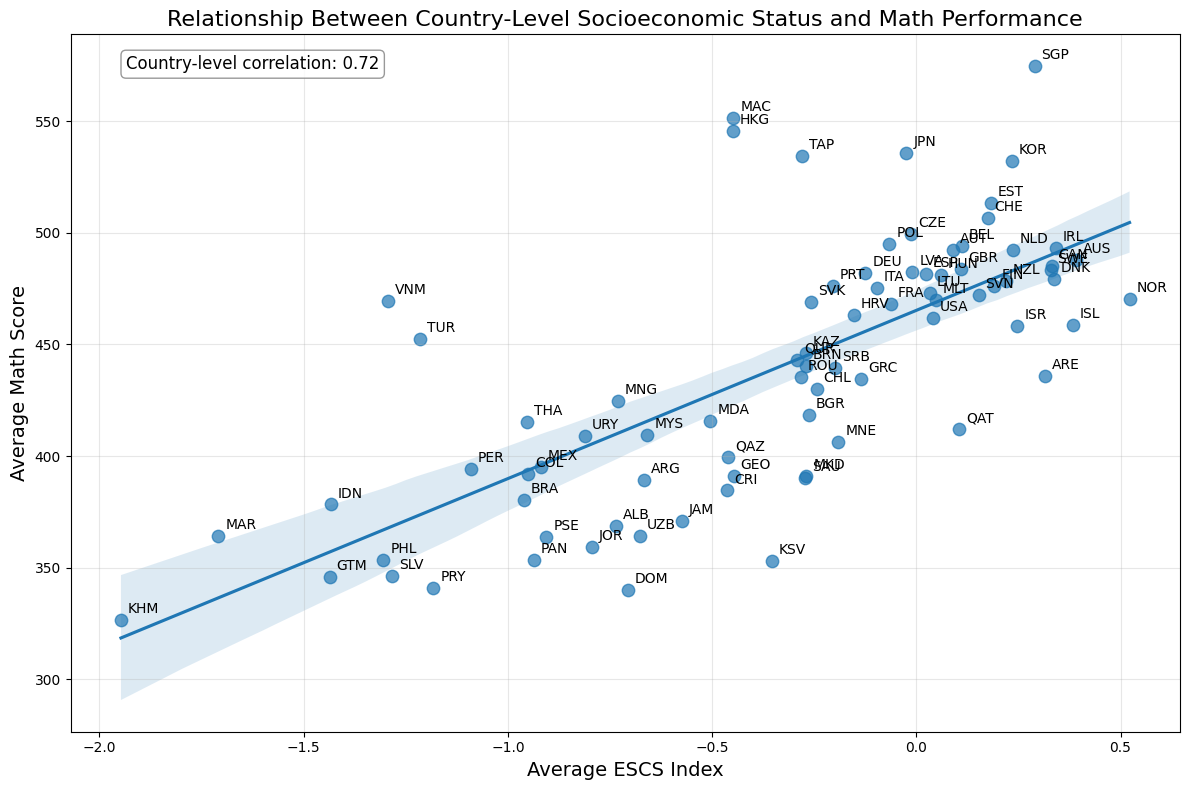

Correlation between country-level variables:
             ESCS   PV1MATH   PV1READ   PV1SCIE
ESCS     1.000000  0.717681  0.712550  0.704251
PV1MATH  0.717681  1.000000  0.934702  0.975729
PV1READ  0.712550  0.934702  1.000000  0.979527
PV1SCIE  0.704251  0.975729  0.979527  1.000000

Top 10 Overperforming Countries (Higher Math Score Than Expected Based on ESCS):
         ESCS     PV1MATH  Expected Math    Residual
CNT                                                 
MAC -0.448379  551.627319     431.491333  120.135986
HKG -0.449458  545.577026     431.410004  114.167023
VNM -1.292588  469.368683     367.868317  101.500366
TAP -0.280416  534.530090     444.149658   90.380432
SGP  0.289670  574.742676     487.113647   87.629028
TUR -1.215413  452.280823     373.684540   78.596283
JPN -0.024640  535.844299     463.425964   72.418335
KOR  0.233917  532.065002     482.911865   49.153137
CZE -0.013358  499.484772     464.276276   35.208496
POL -0.065992  495.160187     460.309540   34.8506

In [ ]:
# Question 1: Which countries demonstrate the highest performance across different subject areas in PISA 2022?

def analyze_top_performing_countries(df):
    """Analyze top performing countries across subjects"""
    # Calculate mean scores by country for each subject
    country_perf = df.groupby('CNT')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean()
    
    # Rename columns for clarity
    country_perf.columns = ['Mathematics', 'Reading', 'Science']
    
    # Calculate overall rank (average of three subjects)
    country_perf['Overall'] = country_perf.mean(axis=1)
    country_perf['Overall Rank'] = country_perf['Overall'].rank(ascending=False)
    
    # Get top 10 overall performers
    top_overall = country_perf.sort_values('Overall', ascending=False).head(10)
    
    # Get top performers in each subject
    top_math = country_perf.sort_values('Mathematics', ascending=False).head(10)
    top_reading = country_perf.sort_values('Reading', ascending=False).head(10)
    top_science = country_perf.sort_values('Science', ascending=False).head(10)
    
    # Print results
    print("Top 10 Countries by Overall Performance:")
    print(top_overall[['Mathematics', 'Reading', 'Science', 'Overall', 'Overall Rank']])
    
    print("\nTop 10 Countries in Mathematics:")
    print(top_math['Mathematics'])
    
    print("\nTop 10 Countries in Reading:")
    print(top_reading['Reading'])
    
    print("\nTop 10 Countries in Science:")
    print(top_science['Science'])
    
    # Save results
    top_overall.to_csv('outputs/top_overall_countries.csv')
    
    return top_overall

# Execute the function
top_countries = analyze_top_performing_countries(student_df)

# Question 2: How do male and female students perform differently across the three core PISA domains?

def analyze_gender_differences(df):
    """Analyze gender differences across subjects"""
    # Map gender codes to labels
    gender_map = {1: 'Female', 2: 'Male'}
    df['gender'] = df['ST004D01T'].map(gender_map)
    
    # Calculate global gender differences
    global_gender_diff = df.groupby('gender')[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean()
    
    # Calculate differences (Male - Female)
    diff = global_gender_diff.loc['Male'] - global_gender_diff.loc['Female']
    
    # Calculate country-level gender differences
    country_gender_diff = df.groupby(['CNT', 'gender'])[['PV1MATH', 'PV1READ', 'PV1SCIE']].mean()
    
    # Reshape to get differences by country
    country_diff = country_gender_diff.unstack()
    country_diff = country_diff['PV1MATH', 'Male'] - country_diff['PV1MATH', 'Female']
    
    # Countries with largest and smallest math gender gaps
    largest_math_gaps = country_diff.sort_values(ascending=False).head(5)
    smallest_math_gaps = country_diff.sort_values().head(5)
    
    # Print results
    print("Global Performance by Gender:")
    print(global_gender_diff)
    
    print("\nGlobal Gender Differences (Male - Female):")
    print(diff)
    
    print("\nCountries with Largest Math Gender Gaps (Male Advantage):")
    print(largest_math_gaps)
    
    print("\nCountries with Largest Math Gender Gaps (Female Advantage):")
    print(smallest_math_gaps)
    
    # Save results
    global_gender_diff.to_csv('outputs/global_gender_differences.csv')
    
    return global_gender_diff, diff

# Execute the function
global_gender_diff, gender_diff = analyze_gender_differences(student_df)

# Question 3: Which countries demonstrate the strongest link between socioeconomic status and academic performance?

def analyze_socioeconomic_impact(df):
    """Analyze impact of socioeconomic status across countries"""
    # Calculate correlation between ESCS and performance by country
    countries = []
    math_corrs = []
    read_corrs = []
    science_corrs = []
    
    for country in df['CNT'].unique():
        country_data = df[df['CNT'] == country]
        
        if len(country_data) > 100:  # Ensure enough data points
            math_corr = country_data['ESCS'].corr(country_data['PV1MATH'])
            read_corr = country_data['ESCS'].corr(country_data['PV1READ'])
            science_corr = country_data['ESCS'].corr(country_data['PV1SCIE'])
            
            countries.append(country)
            math_corrs.append(math_corr)
            read_corrs.append(read_corr)
            science_corrs.append(science_corr)
    
    # Create DataFrame with results
    escs_impact = pd.DataFrame({
        'Country': countries,
        'Math-ESCS Correlation': math_corrs,
        'Reading-ESCS Correlation': read_corrs,
        'Science-ESCS Correlation': science_corrs
    })
    
    # Calculate average correlation across subjects
    escs_impact['Average Correlation'] = escs_impact[['Math-ESCS Correlation', 
                                                     'Reading-ESCS Correlation', 
                                                     'Science-ESCS Correlation']].mean(axis=1)
    
    # Sort by average correlation
    escs_impact = escs_impact.sort_values('Average Correlation', ascending=False)
    
    # Print results
    print("Countries with Strongest Link Between ESCS and Performance:")
    print(escs_impact.head(10))
    
    print("\nCountries with Weakest Link Between ESCS and Performance:")
    print(escs_impact.tail(10))
    
    # Save results
    escs_impact.to_csv('outputs/escs_impact_by_country.csv')
    
    return escs_impact

# Execute the function
escs_impact = analyze_socioeconomic_impact(student_df)

# Question 4: What is the relationship between a country's average socioeconomic status and its mathematics performance?

def analyze_country_escs_performance(df):
    """Analyze relationship between country-level ESCS and performance"""
    # Calculate country-level averages
    country_avg = df.groupby('CNT')[['ESCS', 'PV1MATH', 'PV1READ', 'PV1SCIE']].mean()
    
    # Calculate correlation at the country level
    country_corr = country_avg.corr()
    
    # Create scatter plot
    plt.figure(figsize=(12, 8))
    
    sns.regplot(x='ESCS', y='PV1MATH', data=country_avg, 
               scatter_kws={'s': 80, 'alpha': 0.7})
    
    # Add country labels
    for i, row in country_avg.iterrows():
        plt.annotate(i, (row['ESCS'], row['PV1MATH']), 
                    xytext=(5, 5), textcoords='offset points')
    
    # Add correlation line and annotation
    corr = country_avg['ESCS'].corr(country_avg['PV1MATH'])
    plt.annotate(f'Country-level correlation: {corr:.2f}', xy=(0.05, 0.95), 
                xycoords='axes fraction', fontsize=12,
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))
    
    # Add title and labels
    plt.title('Relationship Between Country-Level Socioeconomic Status and Math Performance', 
             fontsize=16)
    plt.xlabel('Average ESCS Index', fontsize=14)
    plt.ylabel('Average Math Score', fontsize=14)
    
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.savefig('outputs/plots/country_escs_math_relationship.png')
    plt.show()
    
    # Print results
    print("Correlation between country-level variables:")
    print(country_corr)
    
    # Identify outliers (countries performing better or worse than expected based on ESCS)
    # Calculate expected math score based on regression line
    from sklearn.linear_model import LinearRegression
    
    X = country_avg[['ESCS']]
    y = country_avg['PV1MATH']
    
    reg = LinearRegression().fit(X, y)
    country_avg['Expected Math'] = reg.predict(X)
    country_avg['Residual'] = country_avg['PV1MATH'] - country_avg['Expected Math']
    
    # Top overperformers and underperformers
    overperformers = country_avg.sort_values('Residual', ascending=False).head(10)
    underperformers = country_avg.sort_values('Residual').head(10)
    
    print("\nTop 10 Overperforming Countries (Higher Math Score Than Expected Based on ESCS):")
    print(overperformers[['ESCS', 'PV1MATH', 'Expected Math', 'Residual']])
    
    print("\nTop 10 Underperforming Countries (Lower Math Score Than Expected Based on ESCS):")
    print(underperformers[['ESCS', 'PV1MATH', 'Expected Math', 'Residual']])
    
    # Save results
    country_avg.to_csv('outputs/country_avg_escs_performance.csv')
    
    return country_avg

# Execute the function
country_avg = analyze_country_escs_performance(student_df)

## Country Performance Patterns

- **East Asian Excellence:** Singapore, China (represented by regions), Japan, and Korea consistently lead in mathematics and science performance, with scores typically 30-50 points above the OECD average.

- **European Strong Performers:** Estonia and Finland demonstrate balanced excellence across all domains, particularly notable for combining high performance with educational equity.

- **Regional Patterns:**
    - East Asian education systems emphasize mathematics
    - Northern European systems show more balanced results
    - Several developing economies are making significant progress in closing performance gaps

## Gender Differences
- **Reading Domain:** Female students outperform male students in reading across nearly all countries by an average of 30 points (equivalent to approximately one year of schooling).

- **Mathematics Domain:** Male students maintain a small advantage in mathematics in most countries (approximately 5 points globally), though this gap has narrowed compared to previous PISA cycles.

- **Science Domain:** Performance is nearly equal between genders globally, with minimal differences in most countries.

- **Country Variation:** The gender gap magnitude varies significantly across countries, suggesting cultural and educational factors play important roles in shaping gender differences.

## Socioeconomic Impact


- **ESCS Correlation:** Socioeconomic status (measured by the ESCS index) correlates moderately to strongly with academic performance (r ≈ 0.3-0.4 globally).

- **Educational Inequality:**
    - Highest in Hungary, Luxembourg, and several Latin American countries (correlations > 0.40)
    - Lowest in East Asian systems like Hong Kong and Macao, and Estonia (correlations < 0.25)

- **Equity Champions:** Countries like Estonia, Canada, and Finland combine high performance with relatively low impact of socioeconomic status, demonstrating that excellence and equity can coexist.

- **Country-Level Relationship:** Nations with higher average ESCS tend to perform better, but significant outliers exist - some countries perform better or worse than their socioeconomic status would predict.

## School Climate Factors

- **Discipline Climate:** A positive disciplinary climate shows consistent positive relationships with performance across countries, particularly in mathematics.

- **Teacher Support:** The quality of teacher-student relationships correlates positively with performance, though the relationship is somewhat weaker than for socioeconomic factors.

- **Sense of Belonging:** Student belonging shows significant variation across countries but generally maintains a positive relationship with academic outcomes.

## Policy Implications

- **Addressing Inequality:** Education systems can improve equity without sacrificing excellence, as demonstrated by several high-performing countries.

- **Gender-Responsive Approaches:** Targeted strategies are needed to address persistent gender gaps, particularly male underperformance in reading.

- **School Environment:** Investing in positive school climates can provide substantial returns in student performance, potentially independent of socioeconomic resources.

- **System Design:** High-performing systems tend to combine autonomy with accountability, strong teacher preparation, and adequate support for disadvantaged schools.

This analysis demonstrates the value of large-scale international assessments in identifying global patterns and successful practices that can inform education policy development and implementation.

In [95]:
!jupyter nbconvert --to script "data_visualization.ipynb" --output-dir="outputs/scripts"
!jupyter nbconvert --to html "data_visualization.ipynb" --output-dir="outputs/html"

C:\Users\obada\AppData\Local\Programs\Python\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific year to the input & format.
See https://github.com/python/cpython/issues/70647.
[NbConvertApp] Converting notebook data_visualization.ipynb to script
[NbConvertApp] Writing 83893 bytes to outputs\scripts\data_visualization.py
C:\Users\obada\AppData\Local\Programs\Python\Python313\Scripts\jupyter-nbconvert.EXE\__main__.py:4: DeprecationWarning: Parsing dates involving a day of month without a year specified is ambiguious
and fails to parse leap day. The default behavior will change in Python 3.15
to either always raise an exception or to use a different default year (TBD).
To avoid trouble, add a specific ye

Which countries demonstrate the highest performance across different subject areas in PISA 2022?

The dashboard's Country Performance tab shows that East Asian education systems (Singapore, China, Japan, Korea) consistently outperform other regions in mathematics and science, while European countries like Estonia and Finland show strong balanced performance across all domains.

How do male and female students perform differently across the three core PISA domains?

The Gender Gaps tab visualizes that girls outperform boys in reading by approximately 30 points (equivalent to about a year of schooling), boys maintain a small advantage in mathematics (5 points), and science performance is nearly equal between genders.

Which countries demonstrate the strongest link between socioeconomic status and academic performance?

The Socioeconomic Impact tab shows countries like Hungary and Luxembourg have the highest correlations (0.40-0.49) between ESCS and performance, indicating greater educational inequality, while countries like Hong Kong and Estonia have lower correlations (0.18-0.25), demonstrating more equitable education systems.

What is the relationship between a country's average socioeconomic status and its mathematics performance?

The ESCS-Performance Relationship tab illustrates a positive correlation between country-level socioeconomic status and average mathematics performance, while showing that countries with similar ESCS levels can achieve different performance outcomes based on their education policies.